In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from feature_engine.imputation import MeanMedianImputer,  CategoricalImputer, AddMissingIndicator
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  BaggingRegressor

from sklearn.metrics import r2_score, mean_squared_error

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',100)

In [2]:
dataset = pd.read_csv('train (3).csv')

In [3]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
dataset.shape

(1460, 81)

In [5]:
test1 = pd.read_csv('test (3).csv')
test_id = test1.copy()

In [6]:
test1.shape

(1459, 80)

In [7]:
test1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [8]:
sample = pd.read_csv('sample_submission (2).csv')

In [9]:
sample.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [10]:
test1.shape, sample.shape, dataset.shape

((1459, 80), (1459, 2), (1460, 81))

In [11]:
feature_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in feature_with_na:
    print(feature,':'  , np.round(dataset[feature].isnull().mean()*100,4),'% missing value')

LotFrontage : 17.7397 % missing value
Alley : 93.7671 % missing value
MasVnrType : 0.5479 % missing value
MasVnrArea : 0.5479 % missing value
BsmtQual : 2.5342 % missing value
BsmtCond : 2.5342 % missing value
BsmtExposure : 2.6027 % missing value
BsmtFinType1 : 2.5342 % missing value
BsmtFinType2 : 2.6027 % missing value
FireplaceQu : 47.2603 % missing value
GarageType : 5.5479 % missing value
GarageYrBlt : 5.5479 % missing value
GarageFinish : 5.5479 % missing value
GarageQual : 5.5479 % missing value
GarageCond : 5.5479 % missing value
PoolQC : 99.5205 % missing value
Fence : 80.7534 % missing value
MiscFeature : 96.3014 % missing value


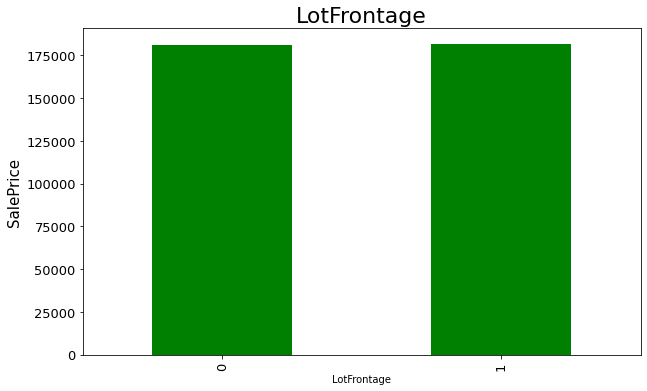

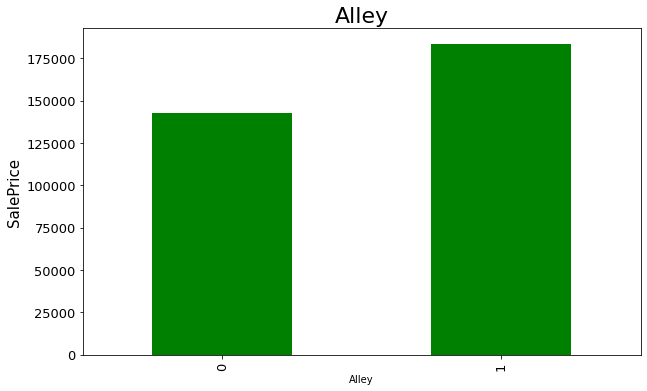

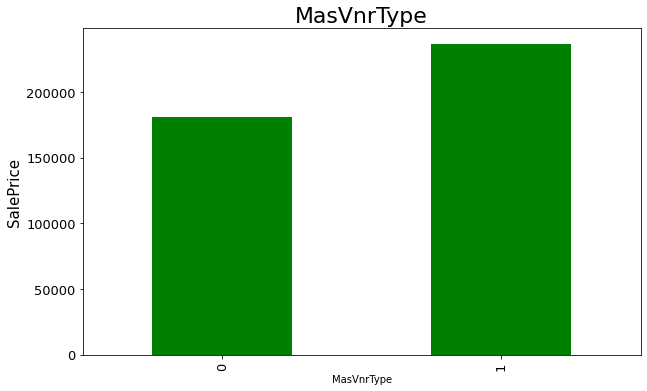

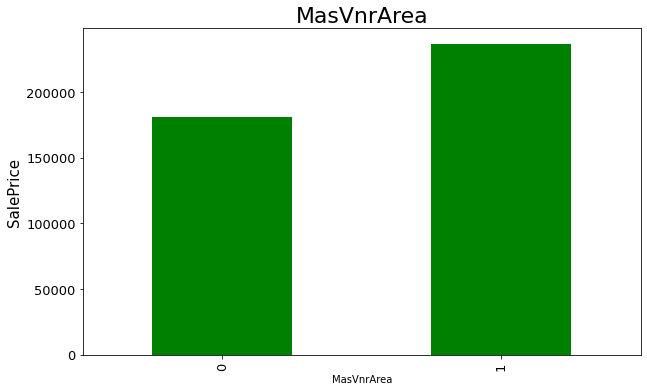

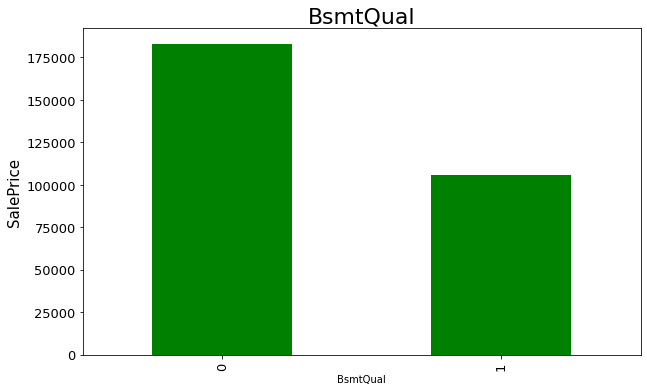

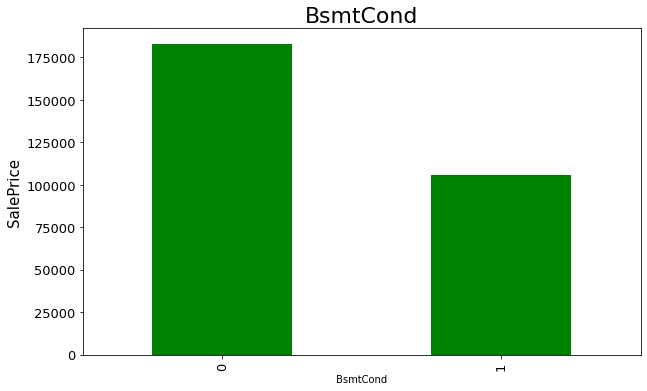

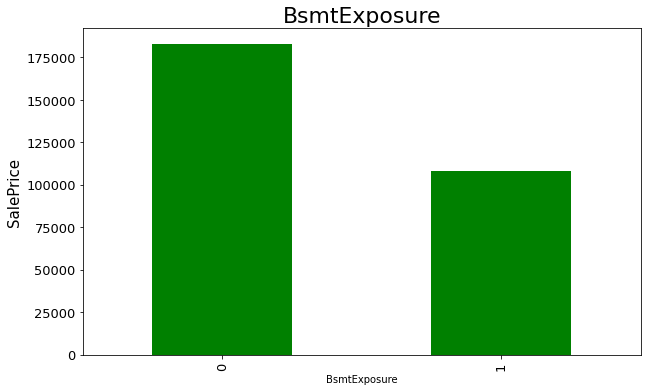

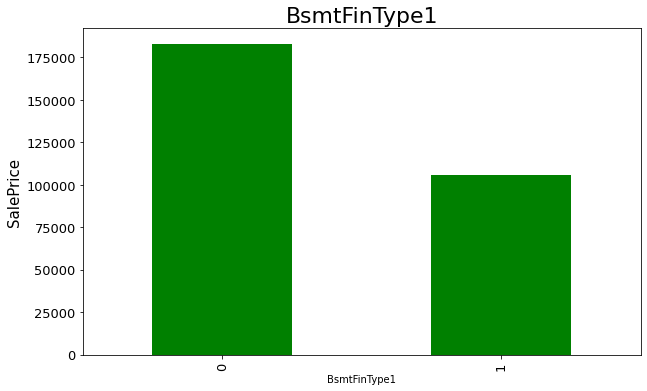

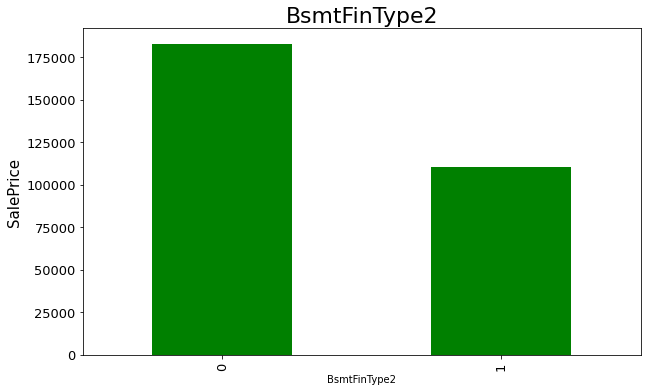

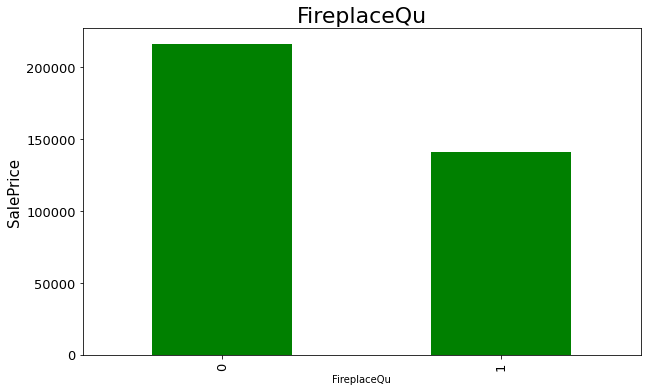

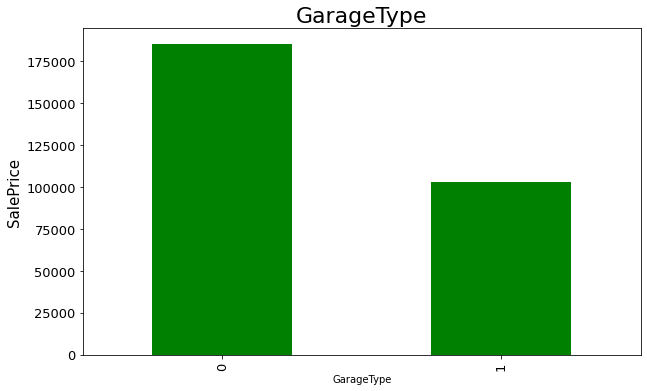

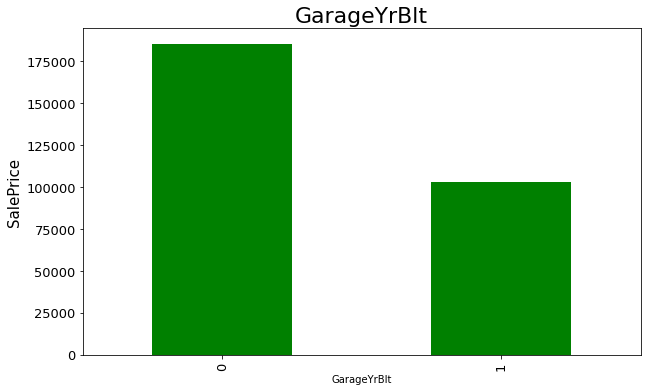

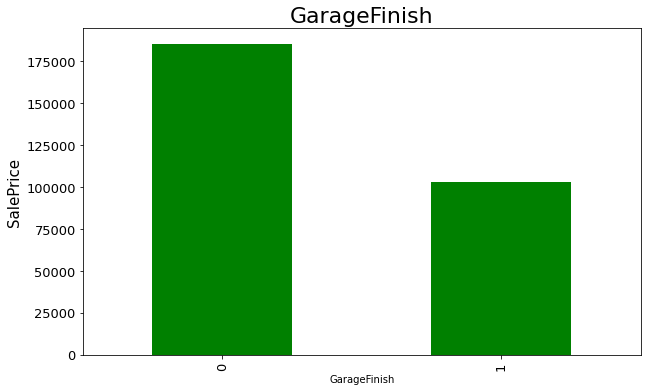

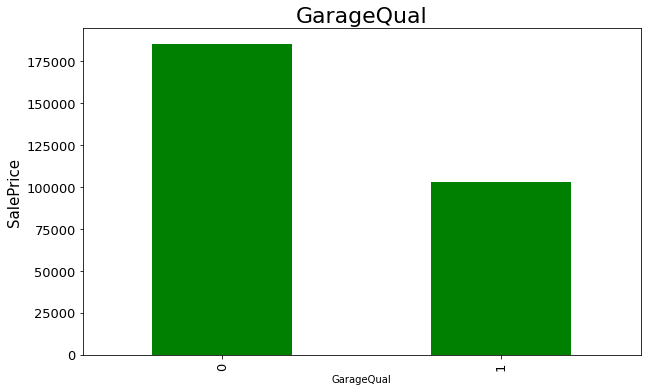

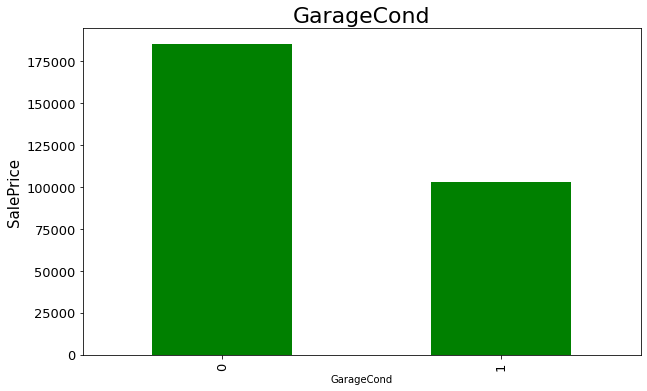

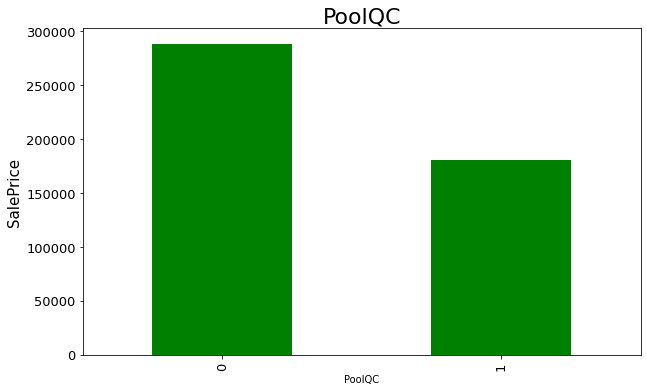

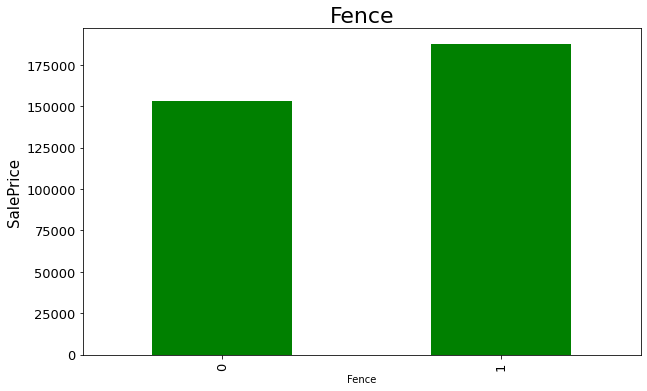

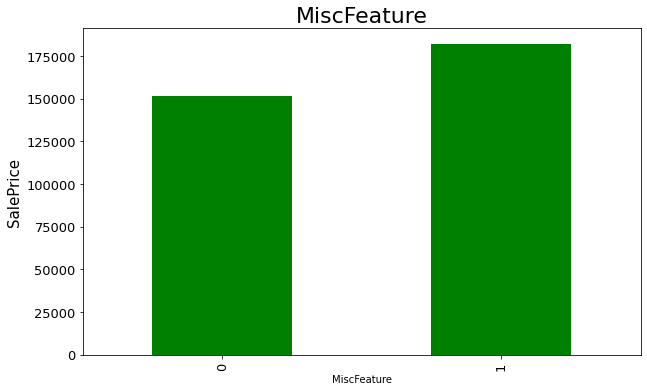

In [12]:
for feature in feature_with_na:
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    df = data.groupby(feature)['SalePrice'].mean()
    ax = df.plot(kind='bar', figsize=(10,6), fontsize=13, color= ( 'green'))
    ax.set_alpha(0.8)
    ax.set_title(feature, fontsize=22)
    ax.set_ylabel('SalePrice', fontsize=15);
    plt.show()

In [13]:
numerical_features = [features for features in dataset.columns if dataset[features].dtypes != 'O']

print('length of nume val ', len(numerical_features))
dataset[numerical_features].head()

length of nume val  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [14]:
categorical_features = [features for features in dataset.columns if dataset[features].dtypes == 'O']

print('length of nume val ', len(categorical_features))
dataset[categorical_features].head()

length of nume val  43


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [15]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature  ]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
for feature in year_feature :
    print(feature, dataset[feature].nunique())

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 97
YrSold 5


In [17]:
for feature in year_feature :
    if feature != 'YrSold' :
        dataset[feature] = dataset['YrSold'] - dataset[feature]

In [18]:
for feature in year_feature :
    if feature != 'YrSold' :
        test1[feature] = test1['YrSold'] - test1[feature] 

In [20]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [21]:
test1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6         49   
1       Norm     1Fam     1Story            6            6         52   
2       Norm     1Fam     2Story            5            5         13   
3       Norm     1Fam     2Story            6            6         12   
4       Norm   TwnhsE     1Story            8            5         18   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            49     Gable  CompShg     VinylSd     VinylSd       None   
1            52       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            12     Gable  CompShg     VinylSd     VinylSd       None   
3            12     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            18     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

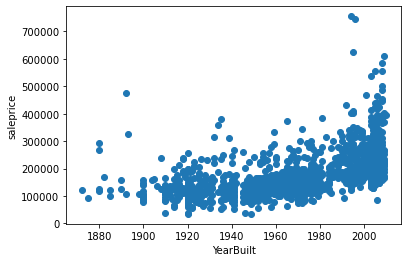

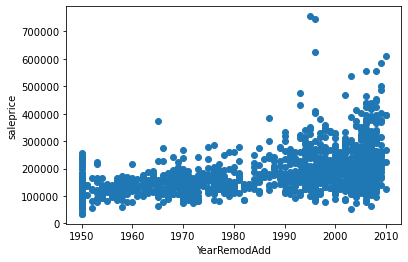

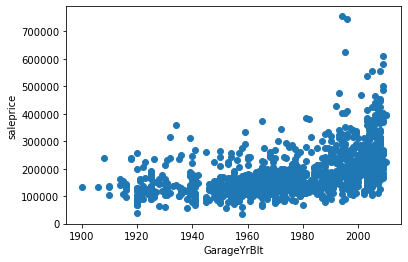

In [23]:
for feature in year_feature :
    if feature != 'YrSold' :
        data = dataset.copy()
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('saleprice')
        plt.show()

In [24]:
discreate_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
#discreate_features

In [25]:
len(discreate_features)

17

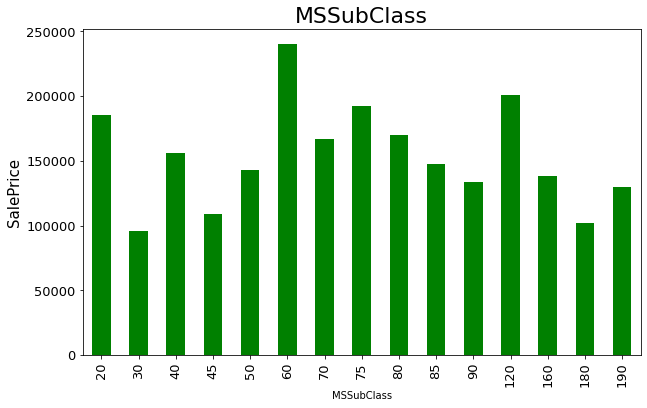

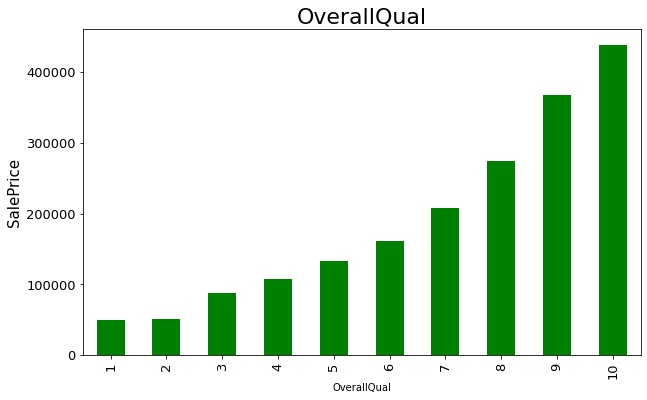

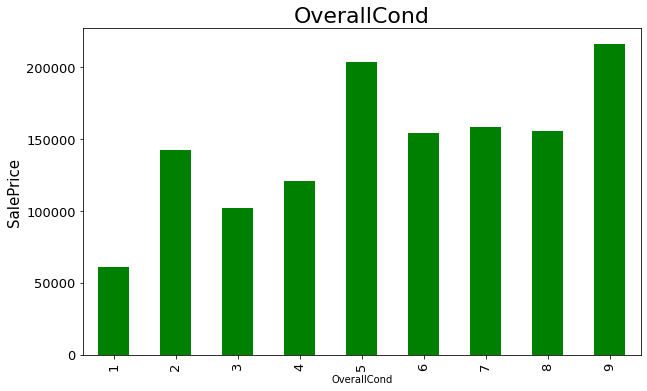

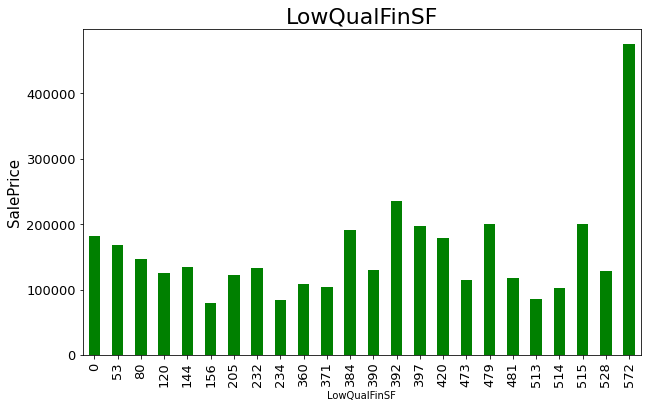

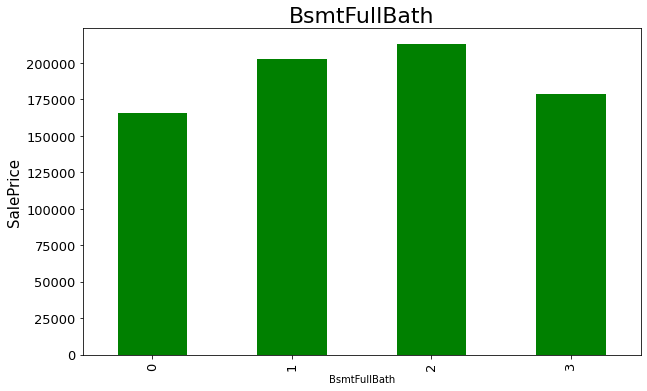

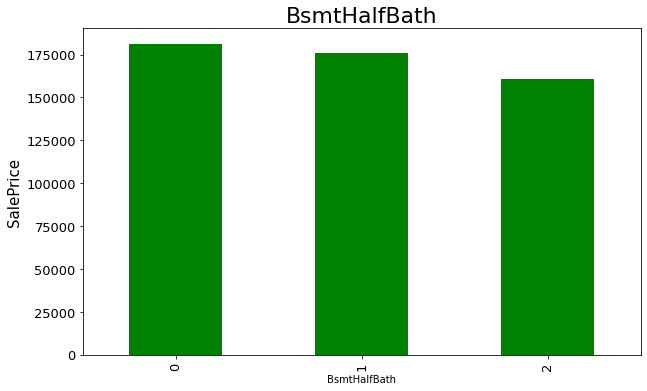

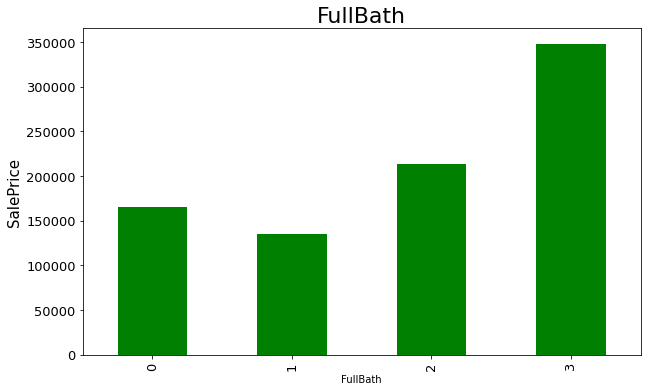

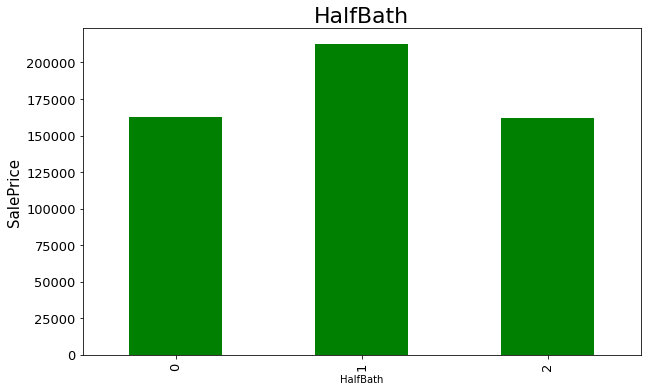

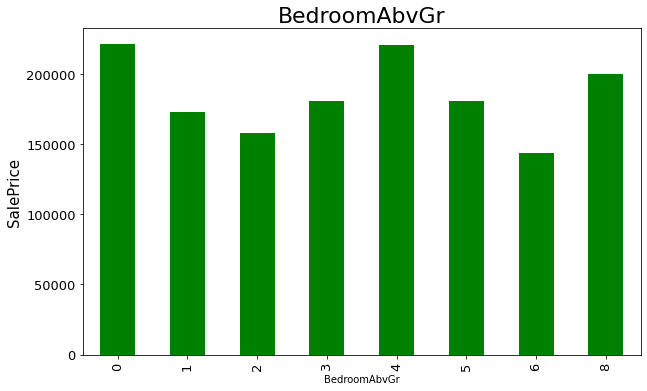

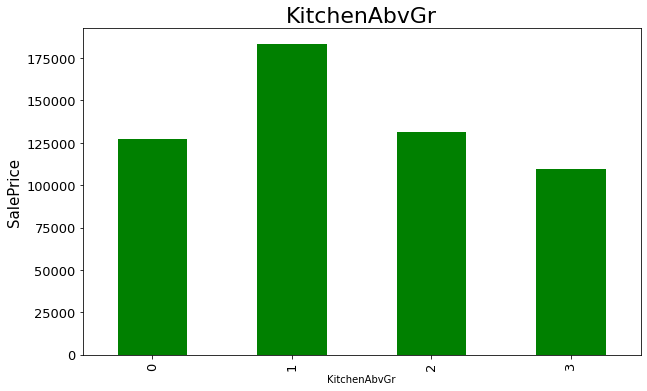

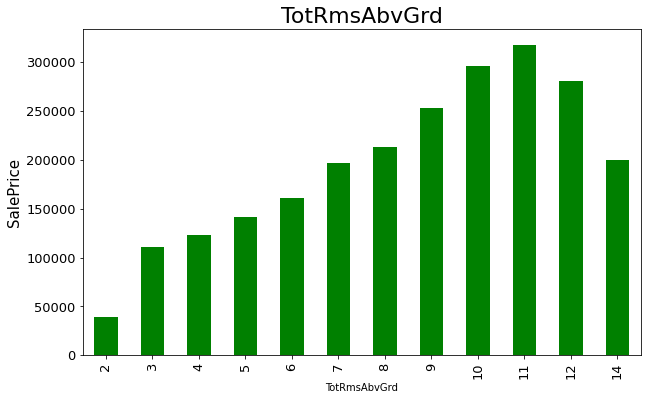

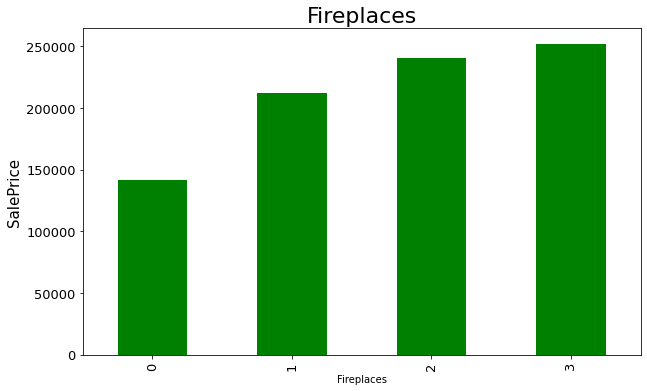

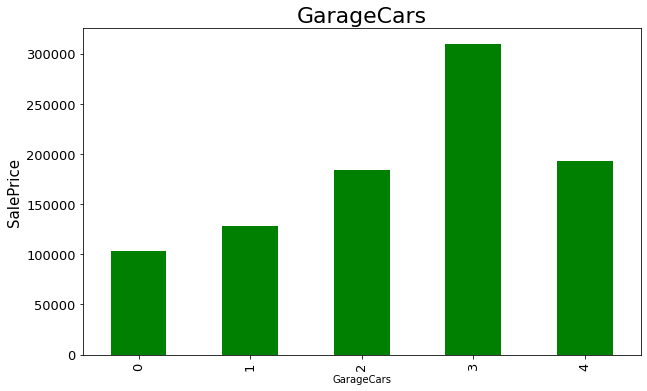

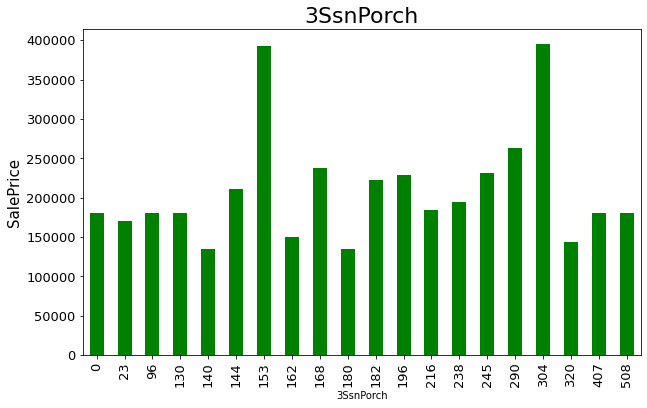

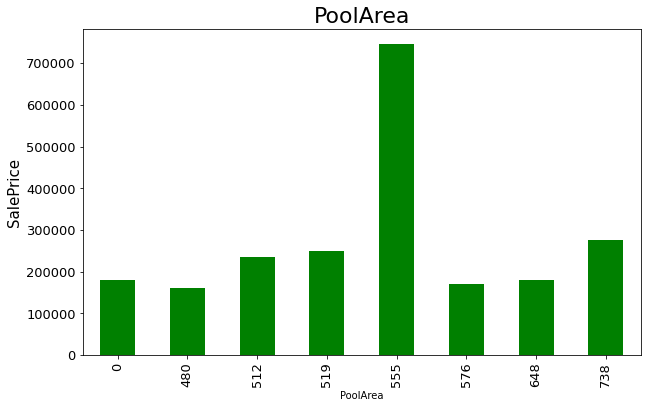

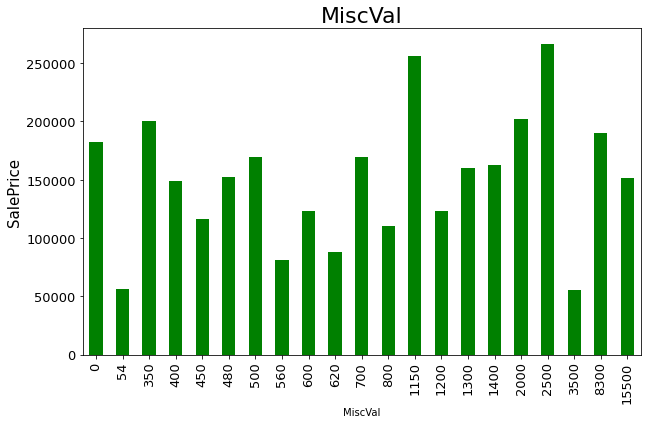

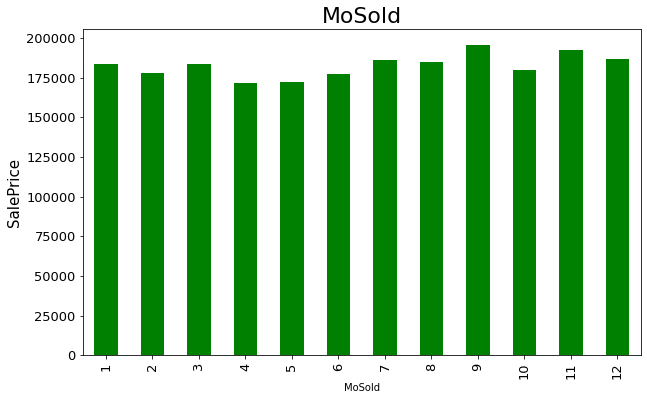

In [26]:
for feature in discreate_features :
    data = dataset.copy()

    df = data.groupby(feature)['SalePrice'].mean()
    ax = df.plot(kind='bar', figsize=(10,6), fontsize=13, color= ( 'green'))
    ax.set_alpha(0.8)
    ax.set_title(feature, fontsize=22)
    ax.set_ylabel('SalePrice', fontsize=15);
    plt.show()

In [27]:
continuous_features =  [feature for feature in numerical_features if  feature not in discreate_features+year_feature+['Id']]
#continuous_features

In [28]:
len(continuous_features)

16

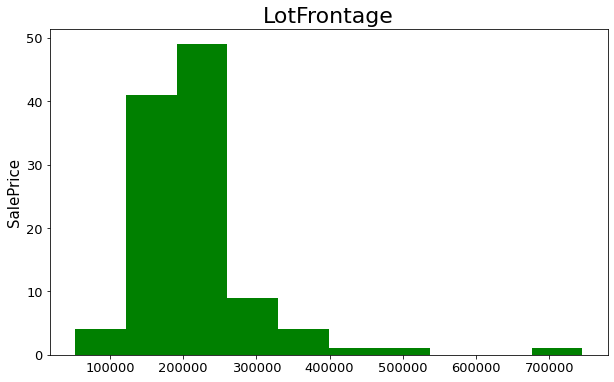

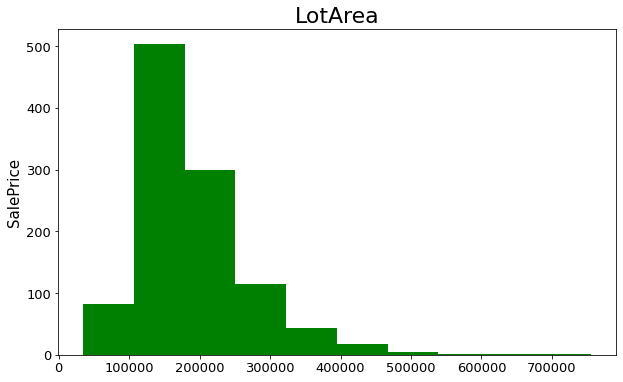

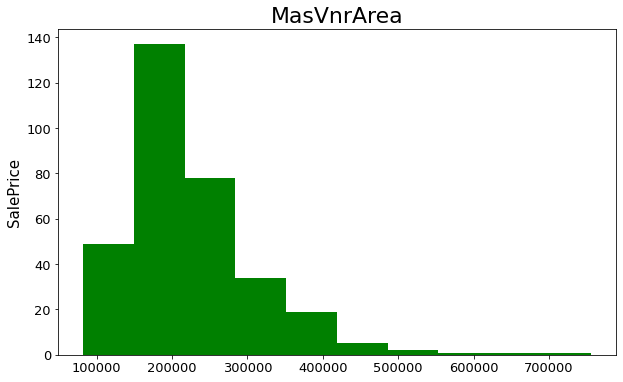

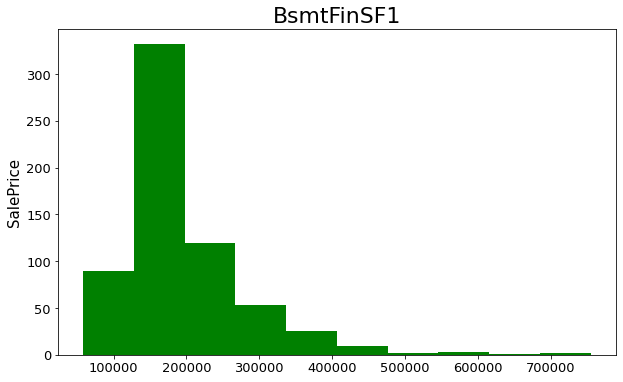

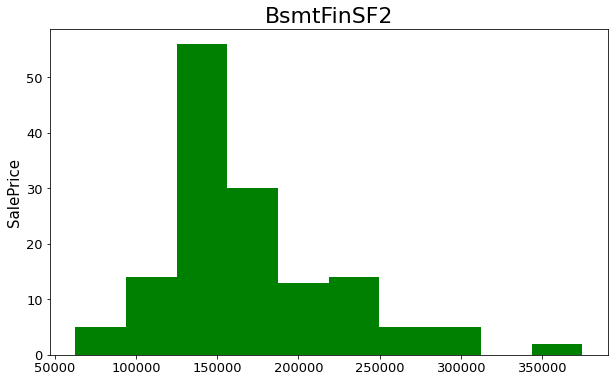

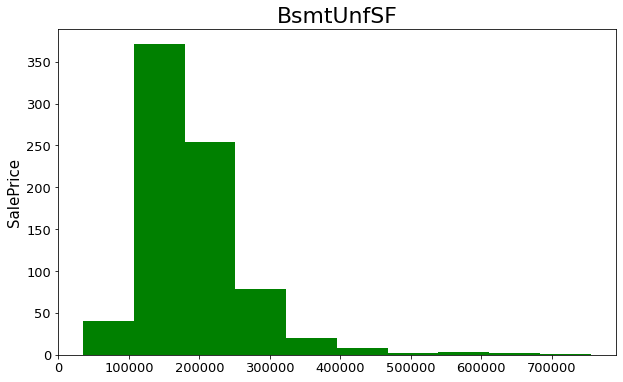

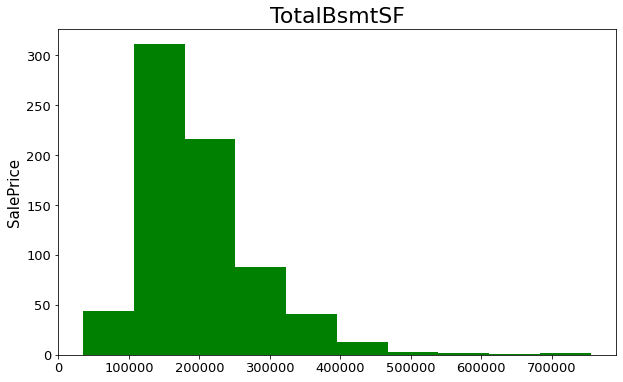

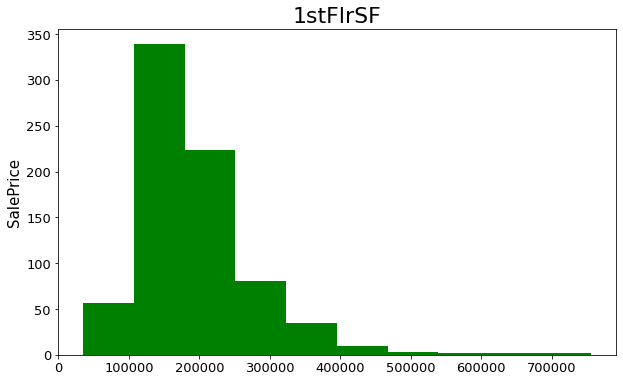

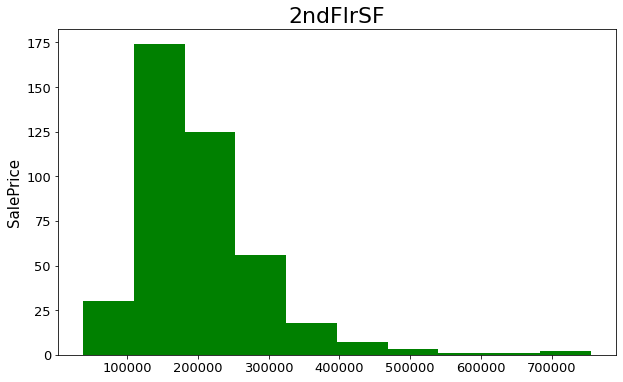

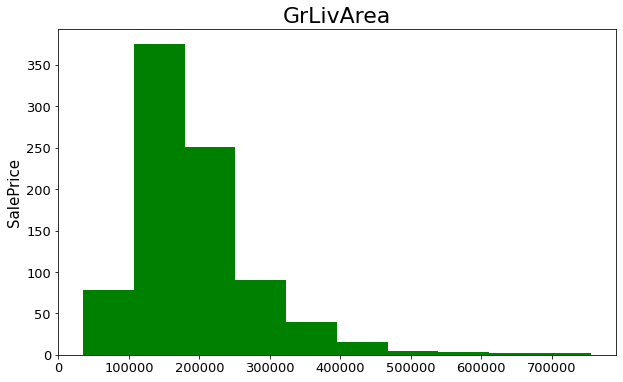

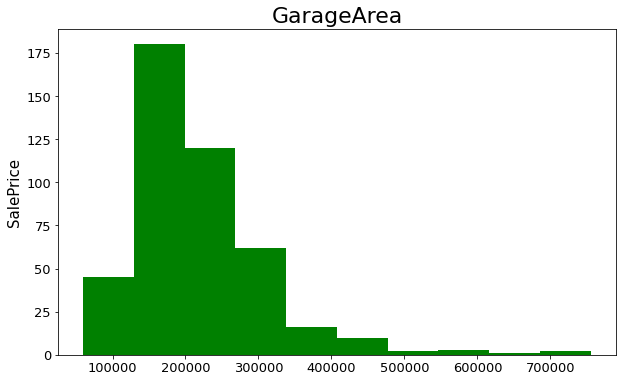

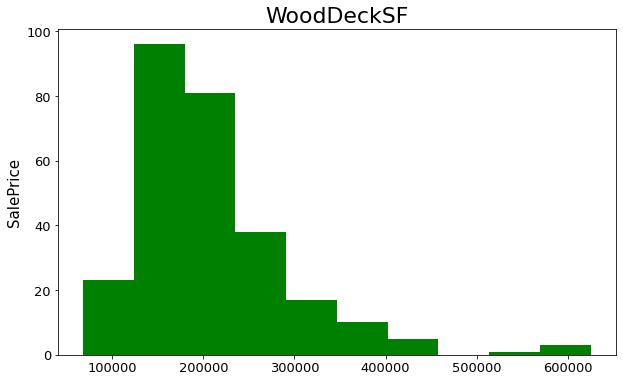

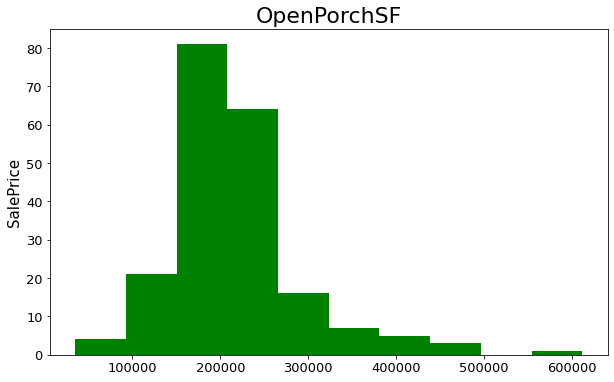

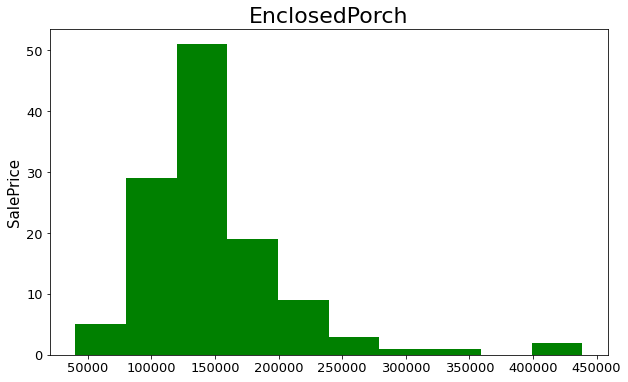

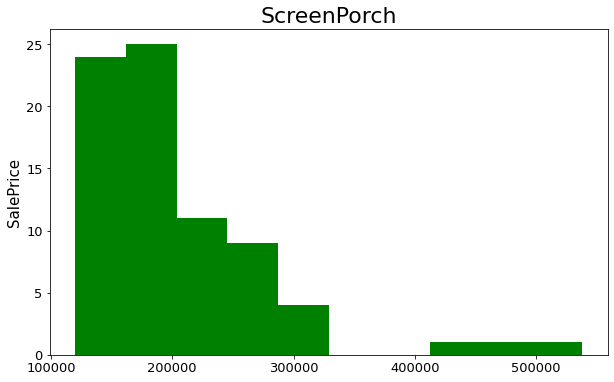

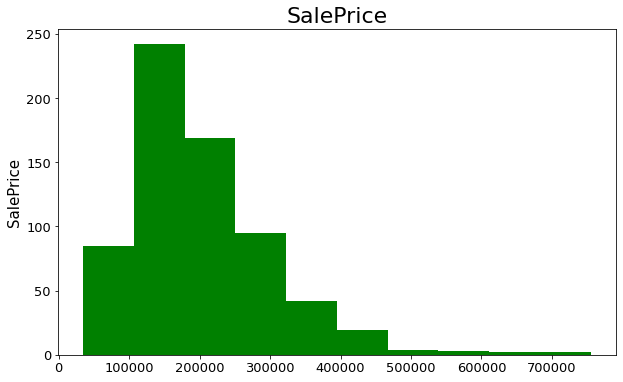

In [29]:
for feature in continuous_features :
    data = dataset.copy()

    df = data.groupby(feature)['SalePrice'].mean()
    ax = df.plot(kind='hist', figsize=(10,6), fontsize=13, color= ( 'green'))
    ax.set_alpha(0.8)
    ax.set_title(feature, fontsize=22)
    ax.set_ylabel('SalePrice', fontsize=15);
    plt.show()

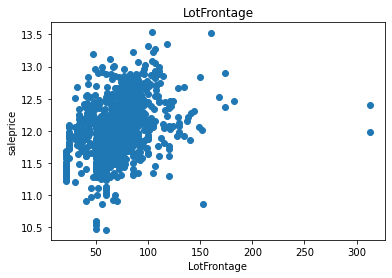

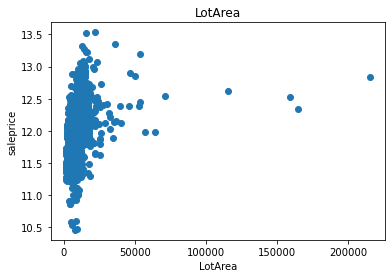

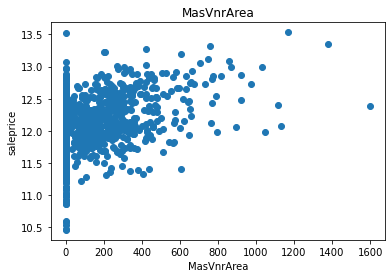

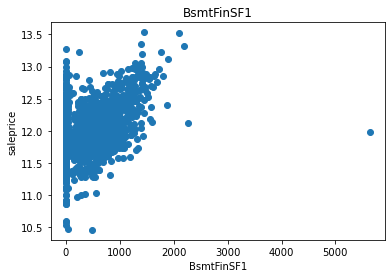

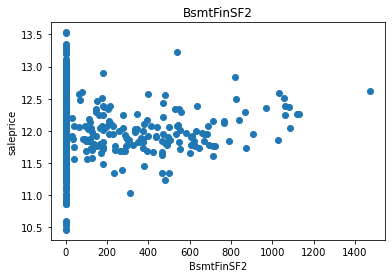

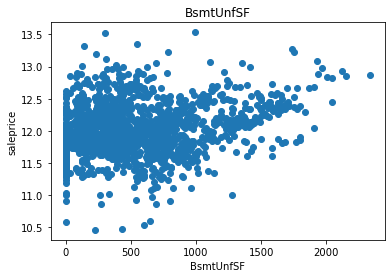

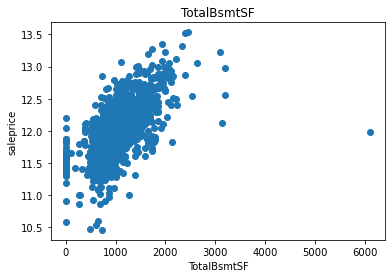

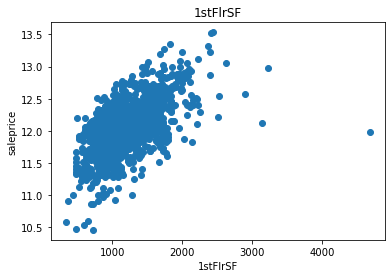

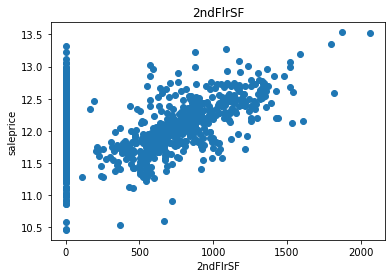

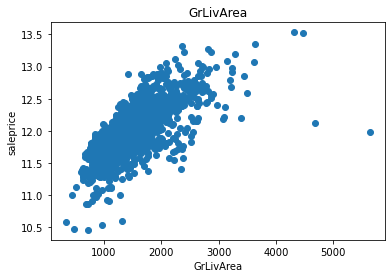

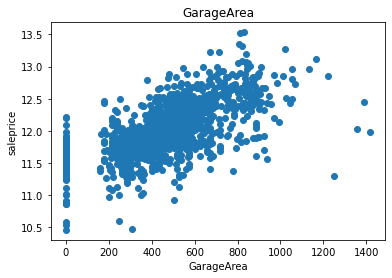

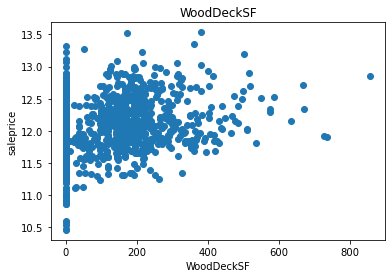

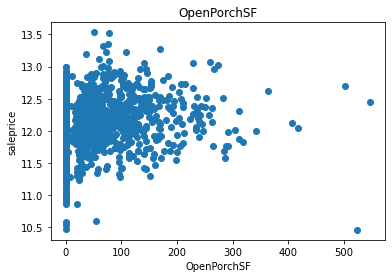

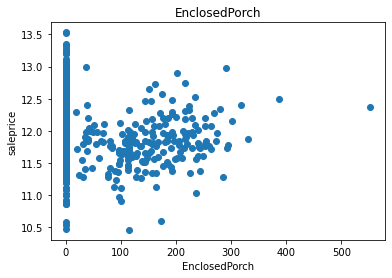

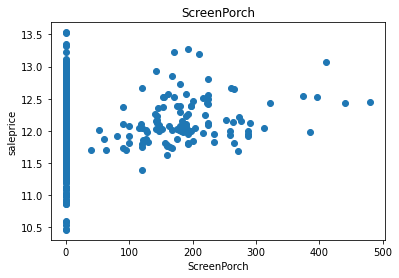

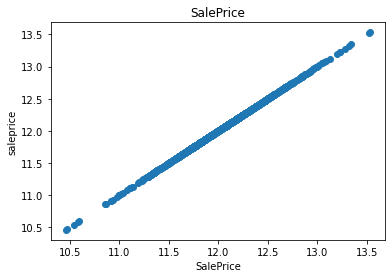

In [30]:

for feature in continuous_features :
    
        data = dataset.copy()
    
        data[feature]= (data[feature])
        data['SalePrice'] =  np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('saleprice')
        plt.title(feature)
        plt.show()
        

# Log normal distribution

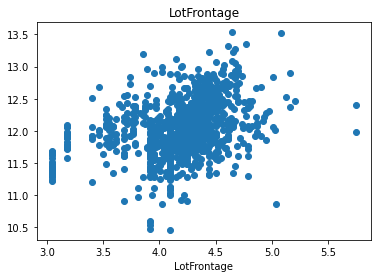

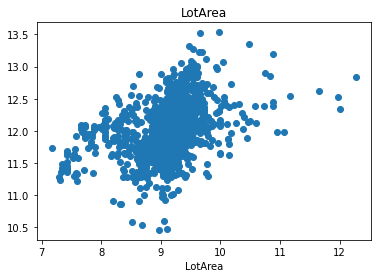

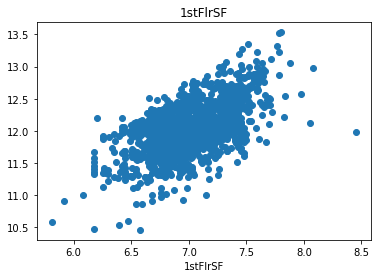

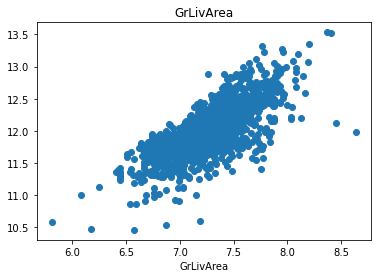

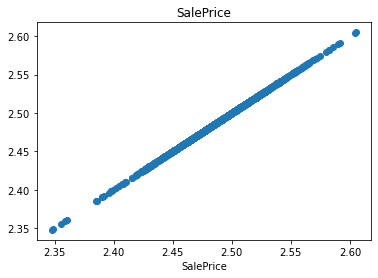

In [31]:
# logorithemic transformation

for feature in continuous_features :
    
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature]= np.log(data[feature])
        data['SalePrice'] =  np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()
        

# outlier

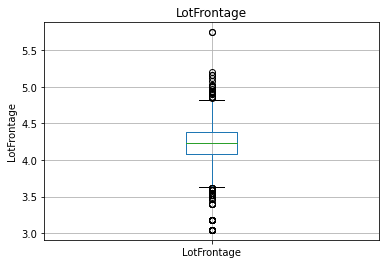

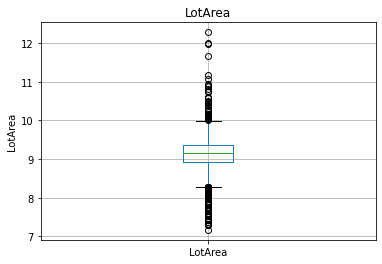

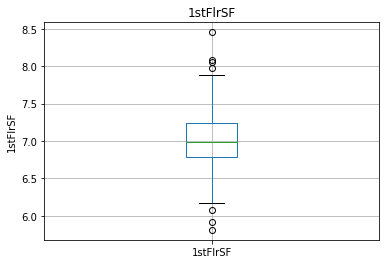

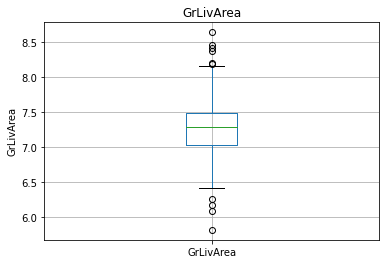

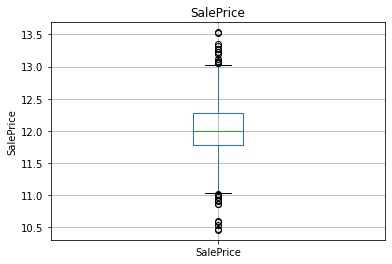

In [32]:
 for feature in continuous_features :   # only for continuous variables 
    
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature]= np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

# Categorical variables

In [33]:
dataset[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [34]:
for feature in  categorical_features:
    print('the feature is {} and number of categories are {}'. format(feature, len(dataset[feature].unique())))

the feature is MSZoning and number of categories are 5
the feature is Street and number of categories are 2
the feature is Alley and number of categories are 3
the feature is LotShape and number of categories are 4
the feature is LandContour and number of categories are 4
the feature is Utilities and number of categories are 2
the feature is LotConfig and number of categories are 5
the feature is LandSlope and number of categories are 3
the feature is Neighborhood and number of categories are 25
the feature is Condition1 and number of categories are 9
the feature is Condition2 and number of categories are 8
the feature is BldgType and number of categories are 5
the feature is HouseStyle and number of categories are 8
the feature is RoofStyle and number of categories are 6
the feature is RoofMatl and number of categories are 8
the feature is Exterior1st and number of categories are 15
the feature is Exterior2nd and number of categories are 16
the feature is MasVnrType and number of cate

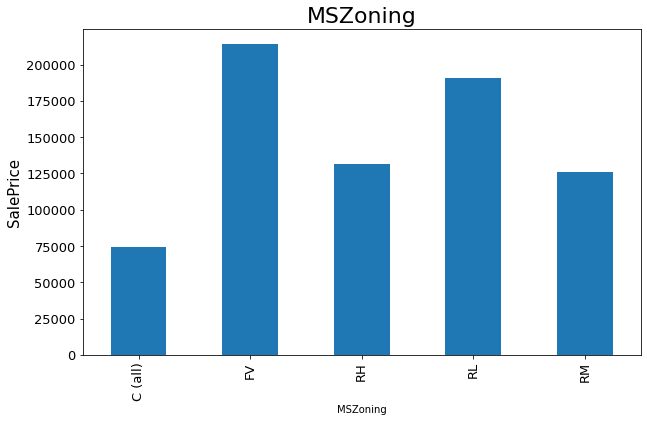

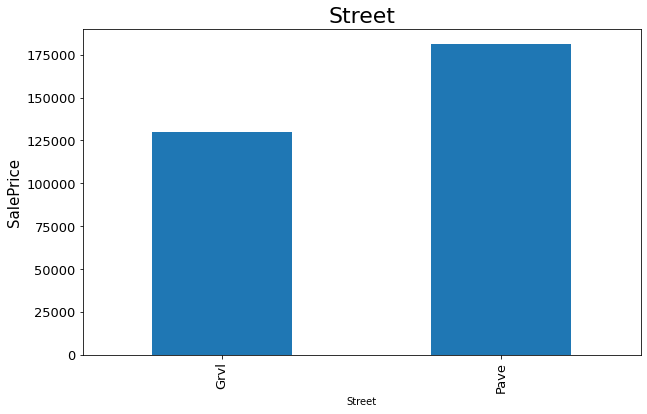

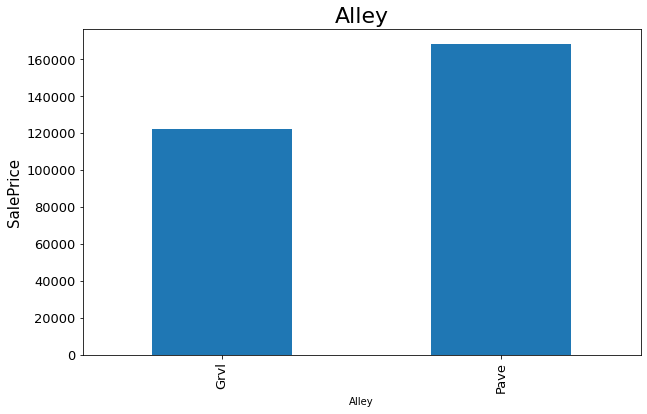

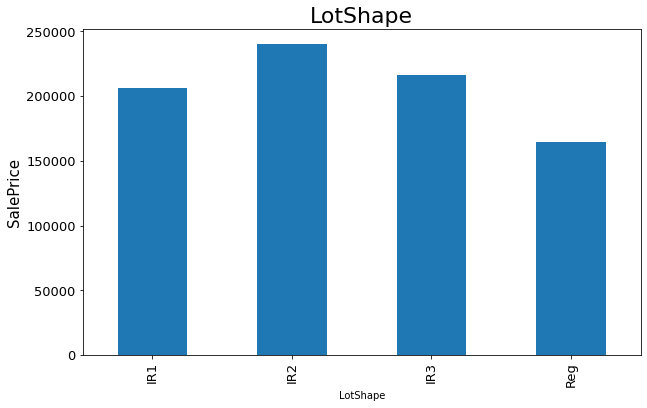

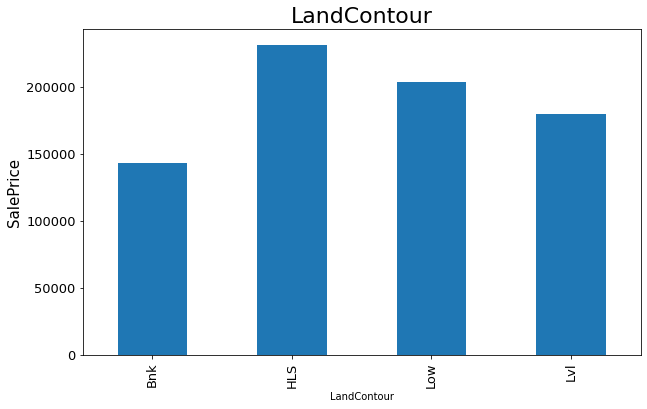

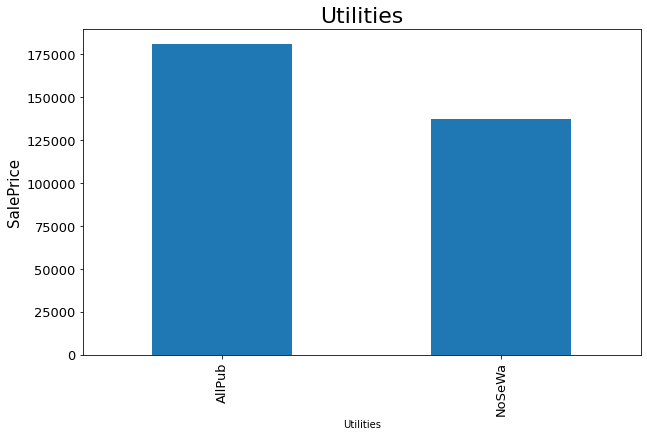

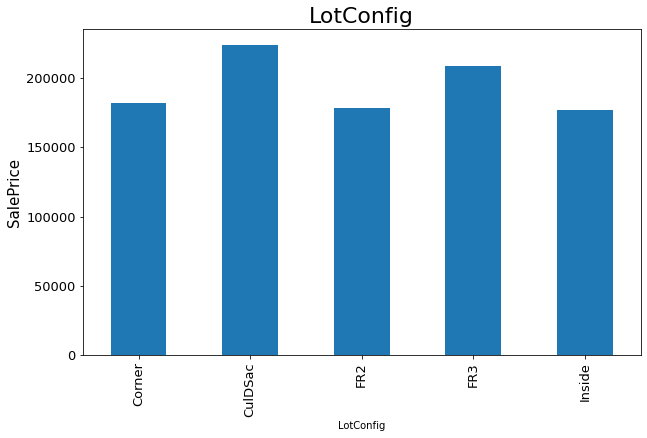

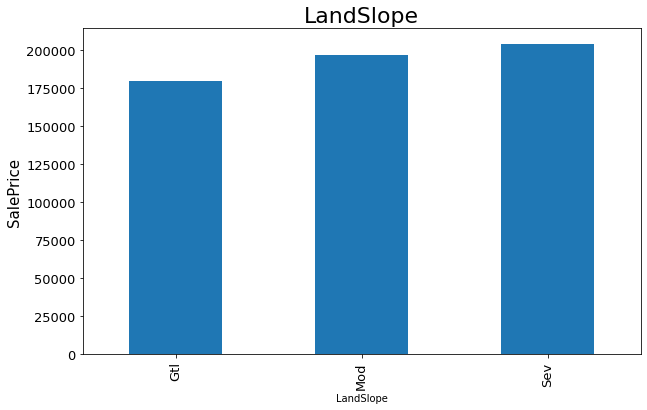

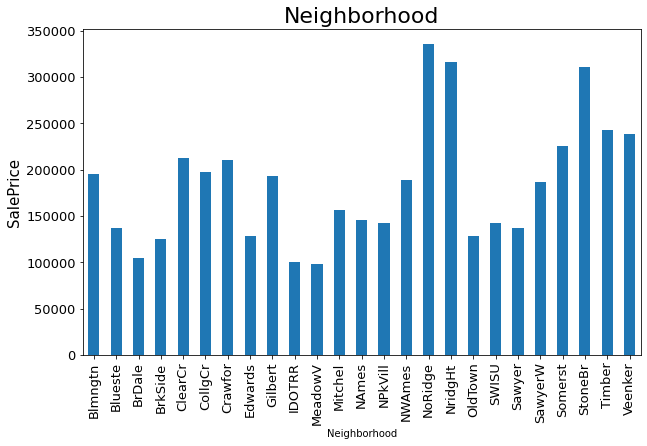

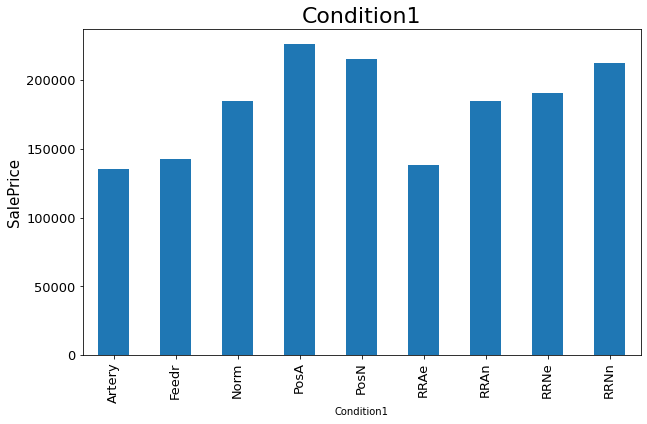

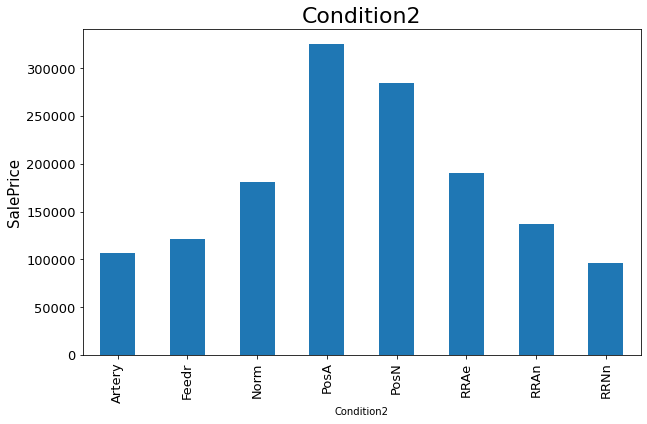

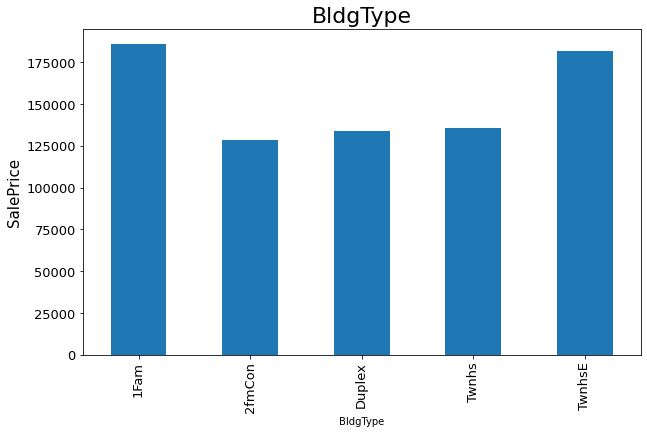

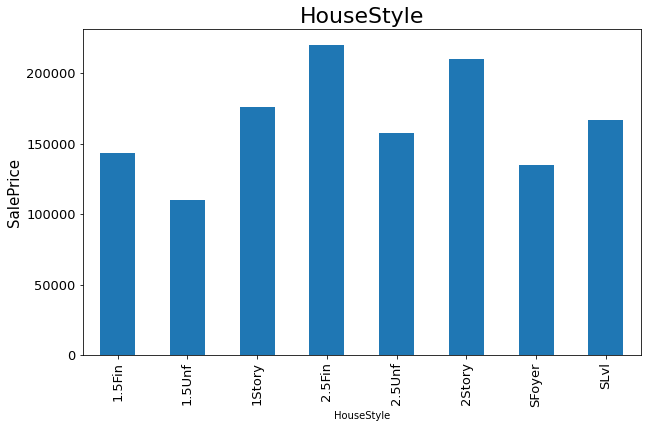

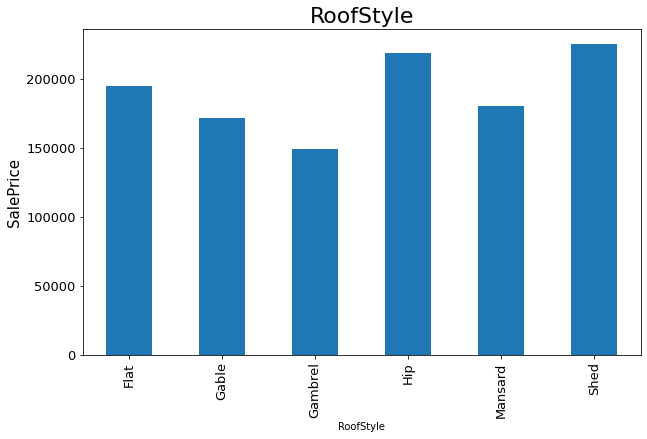

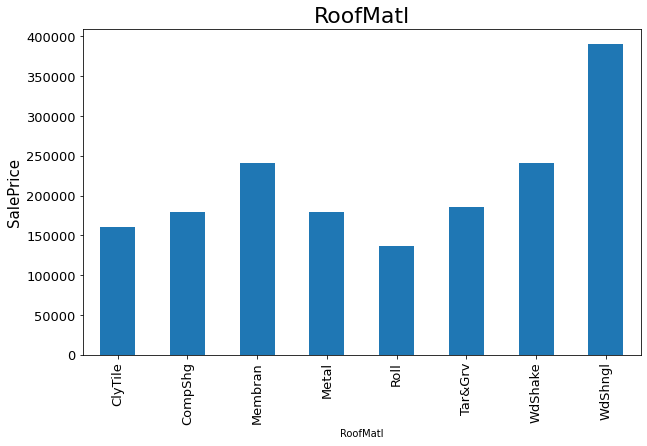

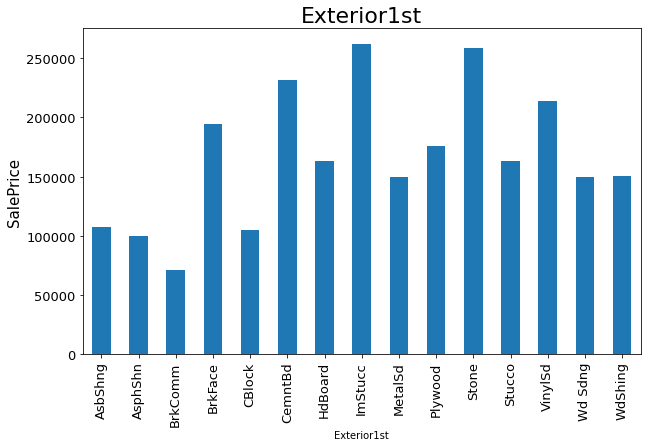

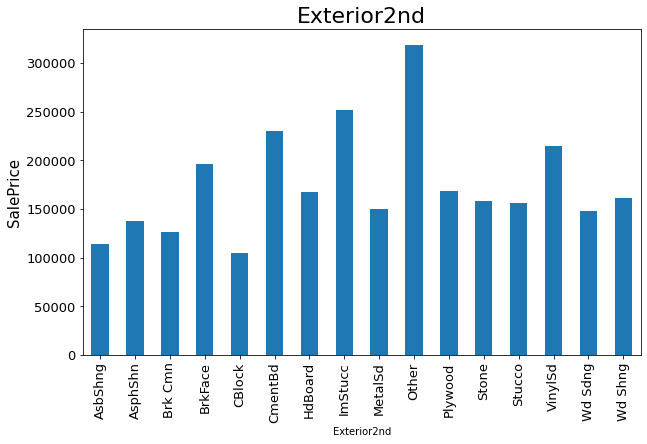

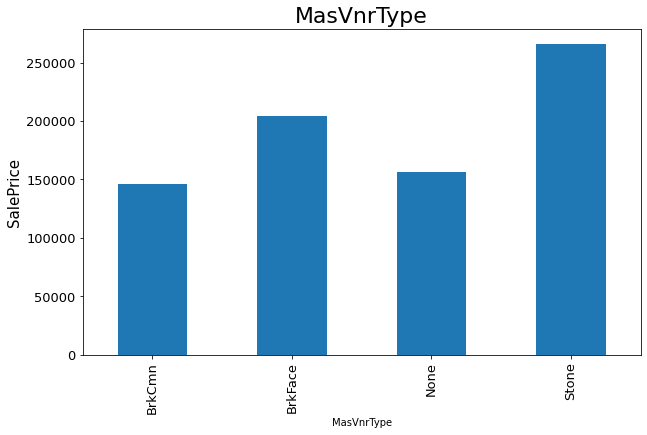

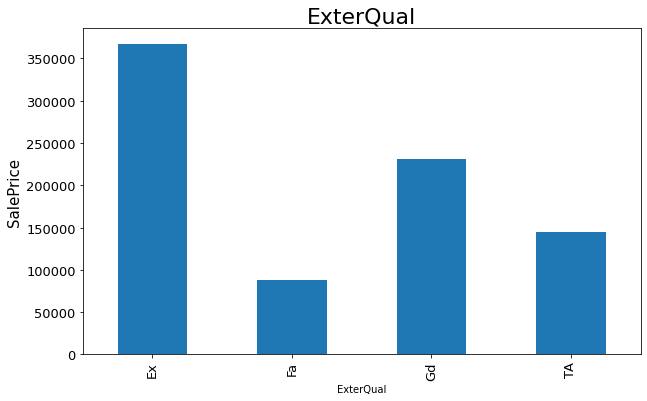

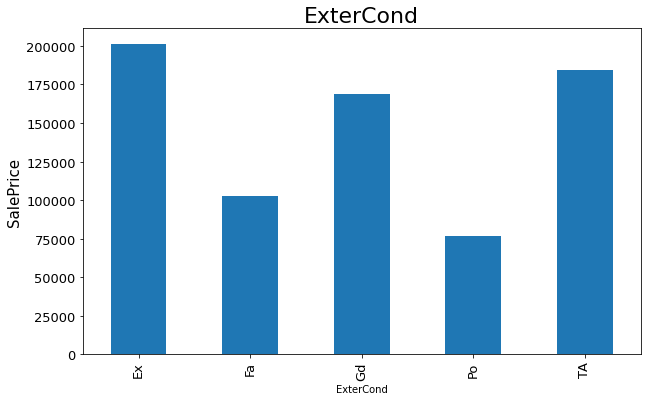

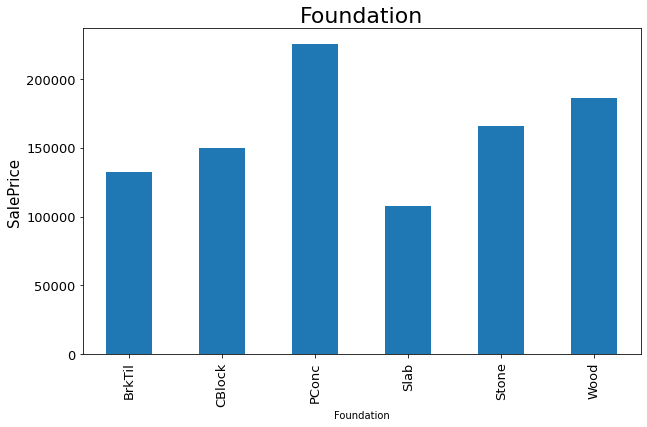

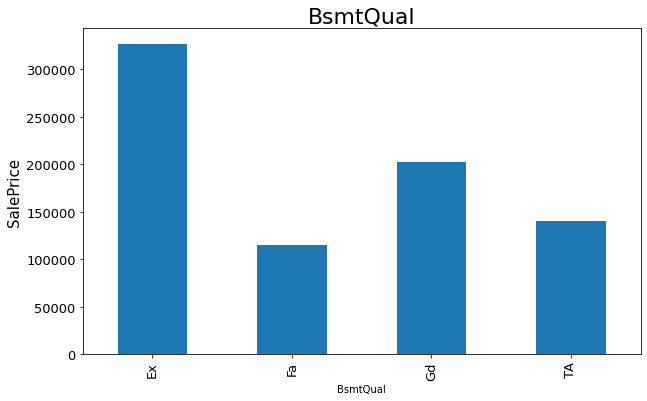

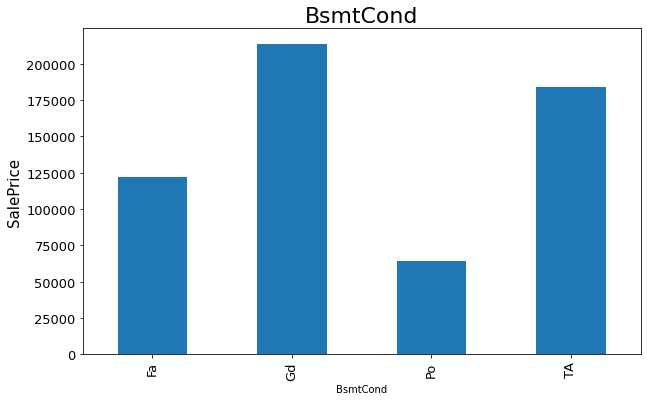

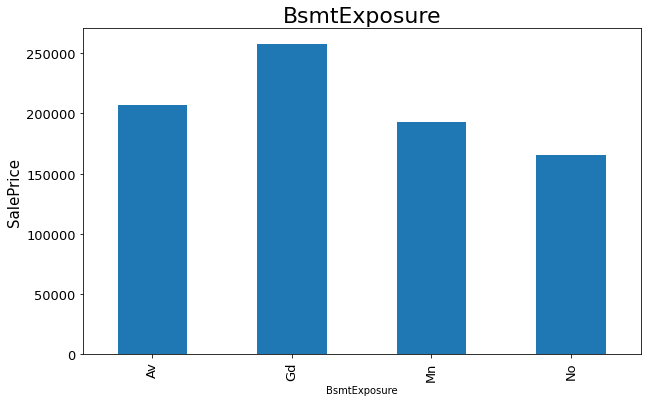

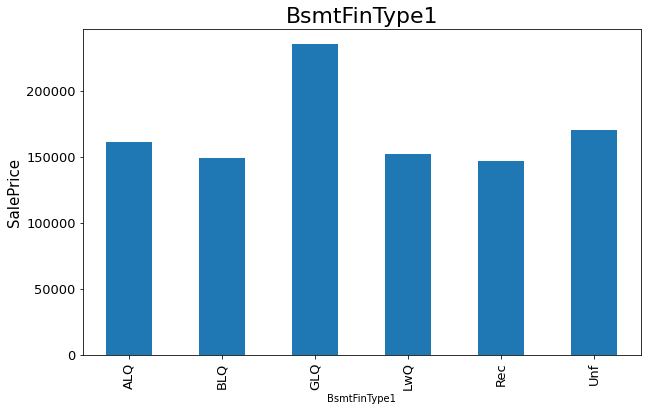

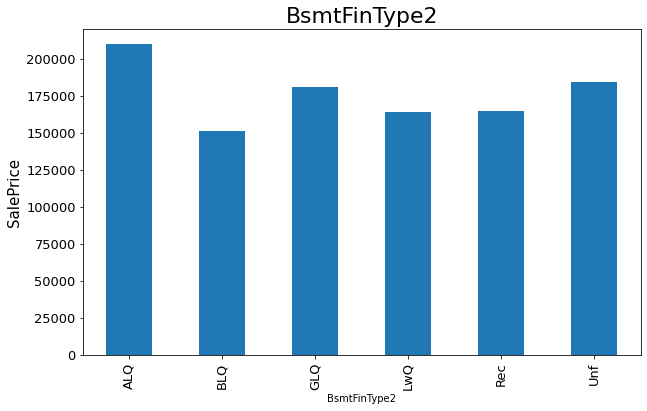

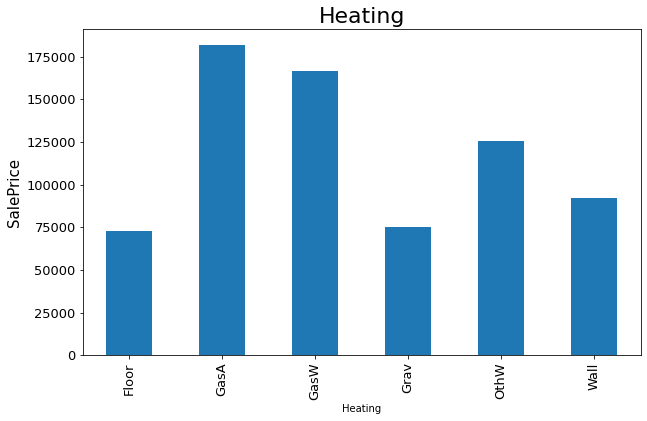

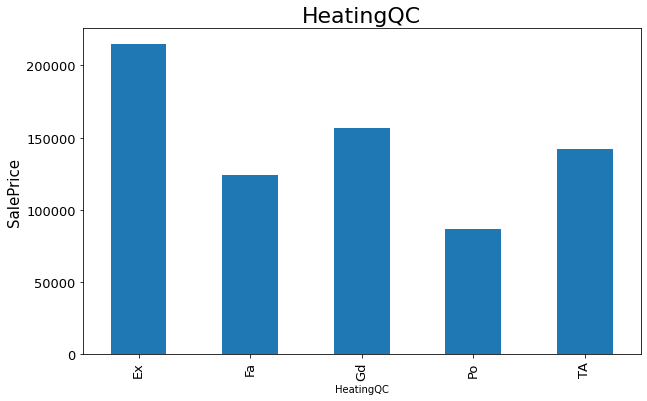

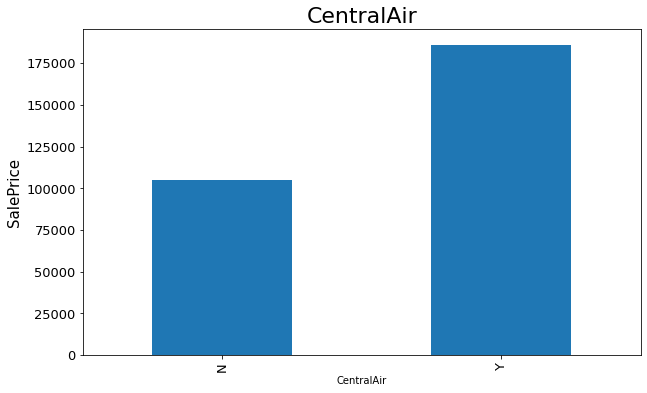

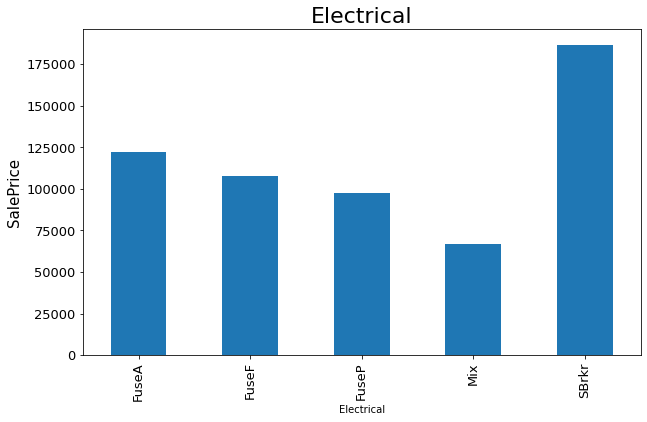

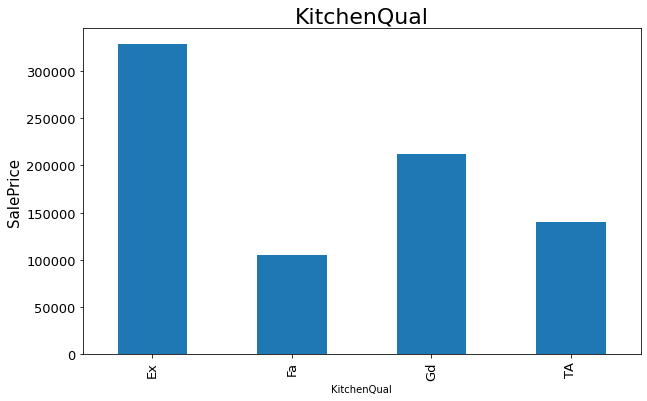

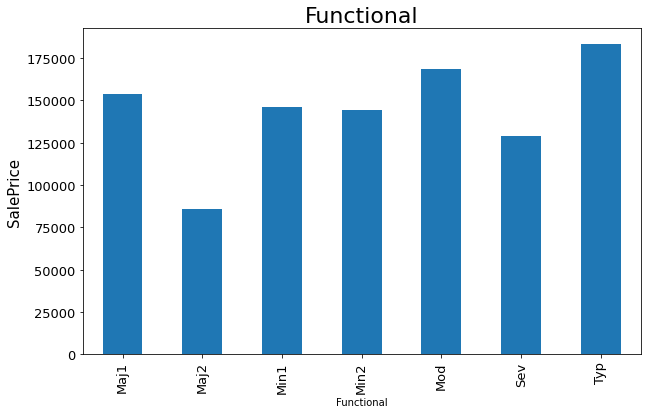

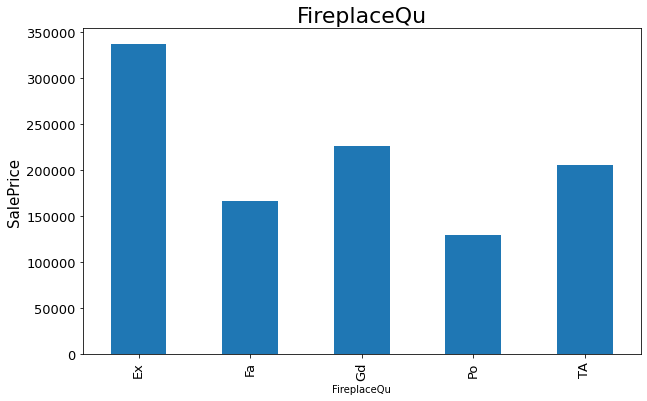

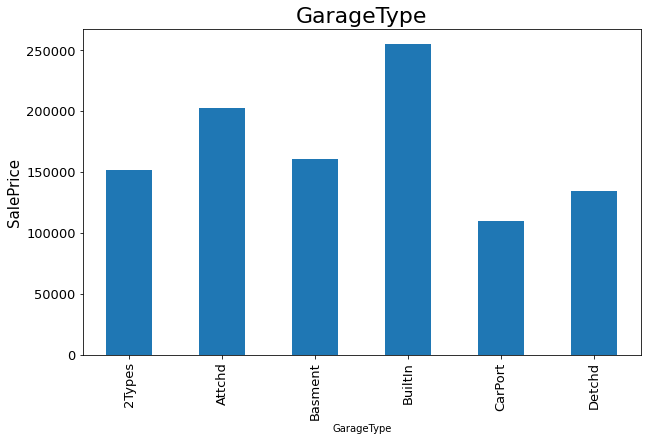

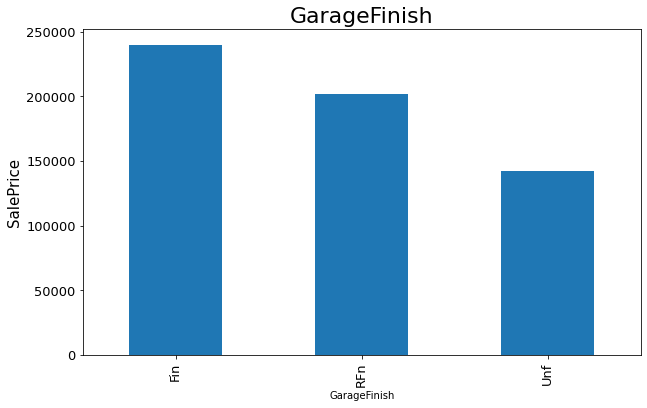

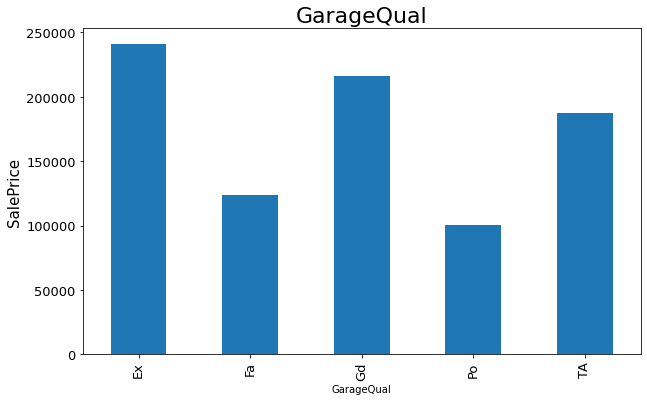

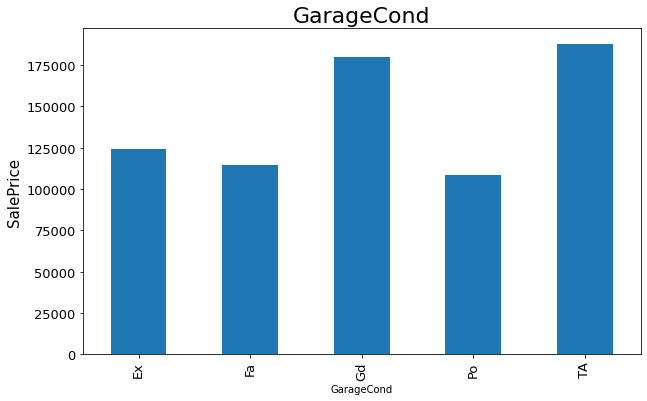

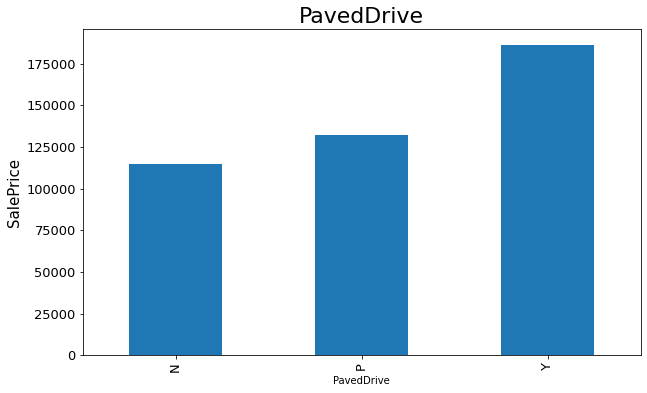

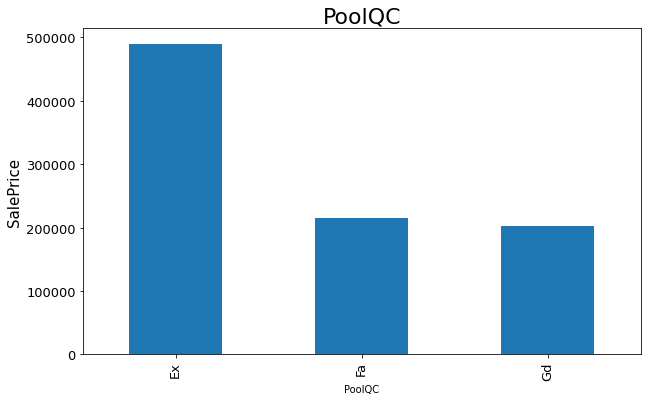

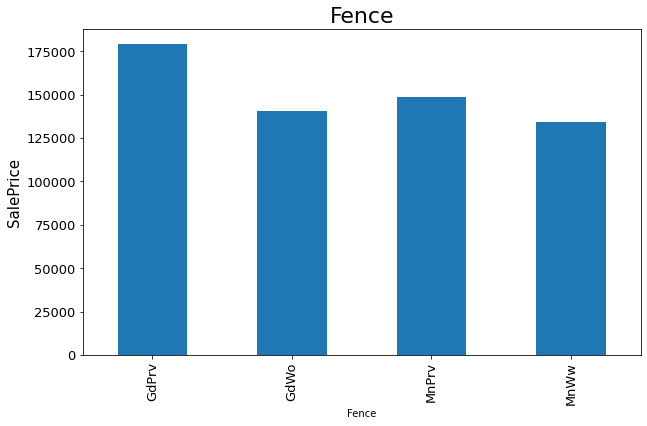

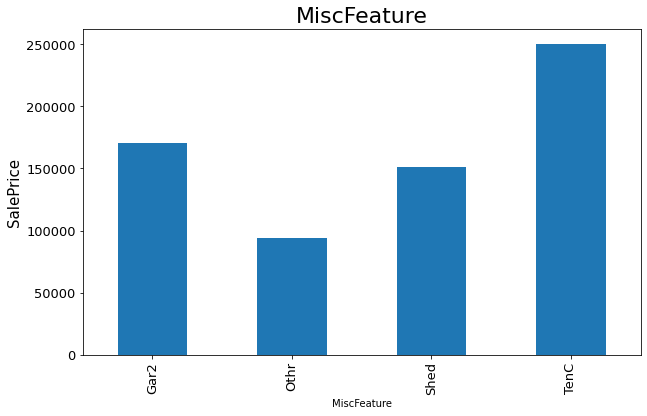

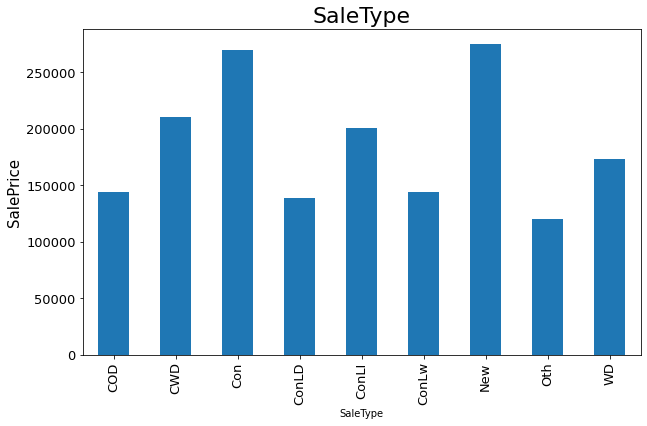

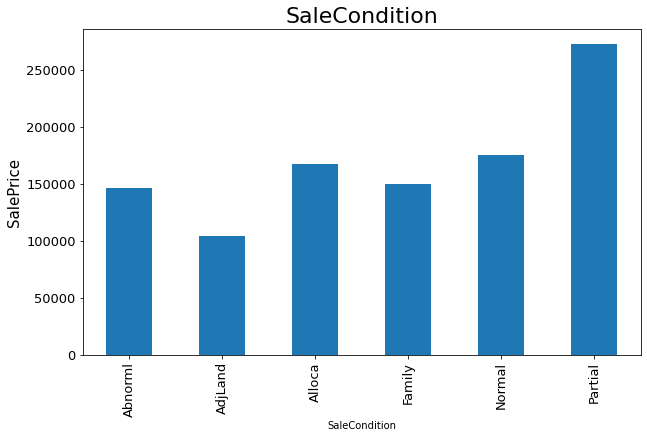

In [35]:
for feature in categorical_features :
    data = dataset.copy()

    df = data.groupby(feature)['SalePrice'].mean()
    ax = df.plot(kind='bar', figsize=(10,6), fontsize=13 )
    ax.set_alpha(0.8)
    ax.set_title(feature, fontsize=22)
    ax.set_ylabel('SalePrice', fontsize=15);
    plt.show()


# FE

In [36]:
dataset.drop('Id', axis=1, inplace=True)
test1.drop('Id', axis=1, inplace=True)

In [37]:
dataset.shape, test1.shape

((1460, 80), (1459, 79))

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [39]:
# Defines a function for Missing values
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    t = total[total>0]
    percentage=round(total/data.shape[0]*100,2)
    p = percentage[percentage>0]
    return pd.concat([t,p],axis=1,keys=['Total','Percentage'])
missing_value_of_data(dataset)

Total  Percentage
PoolQC         1453       99.52
MiscFeature    1406       96.30
Alley          1369       93.77
Fence          1179       80.75
FireplaceQu     690       47.26
LotFrontage     259       17.74
GarageYrBlt      81        5.55
GarageCond       81        5.55
GarageType       81        5.55
GarageFinish     81        5.55
GarageQual       81        5.55
BsmtExposure     38        2.60
BsmtFinType2     38        2.60
BsmtCond         37        2.53
BsmtQual         37        2.53
BsmtFinType1     37        2.53
MasVnrArea        8        0.55
MasVnrType        8        0.55
Electrical        1        0.07

In [41]:
dataset.drop(['PoolQC','MiscFeature', 'Alley','Fence', 'FireplaceQu'], axis = 1, inplace = True)
test1.drop(['PoolQC','MiscFeature', 'Alley','Fence', 'FireplaceQu'], axis = 1, inplace = True)

In [47]:
num = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and 'SalePrice' not in feature ]
categorical = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

In [48]:
dataset.shape, test1.shape

((1460, 75), (1459, 74))

In [54]:
dataset1 = dataset.drop('SalePrice', axis = 1)

In [55]:
from feature_engine.imputation import MeanMedianImputer
median_imputer = MeanMedianImputer(imputation_method='median', variables= num)
median_imputer.fit(dataset1)
train_t= median_imputer.transform(dataset1)
test_t= median_imputer.transform(test1)

C:\Users\pramod\AppData\Local\Temp/ipykernel_18116/2048190627.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


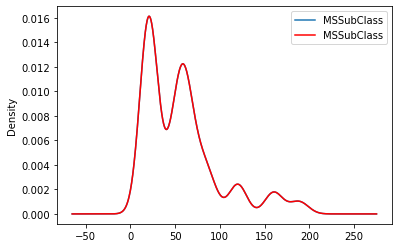

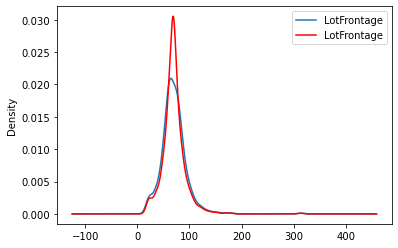

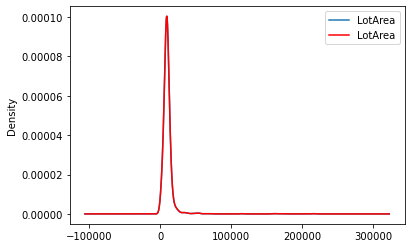

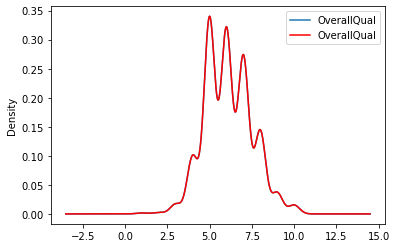

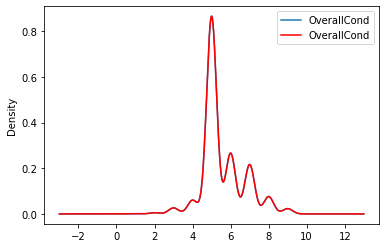

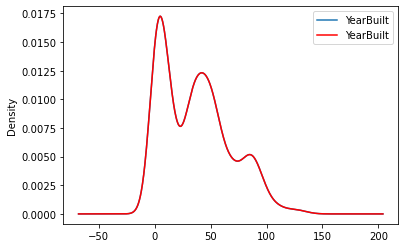

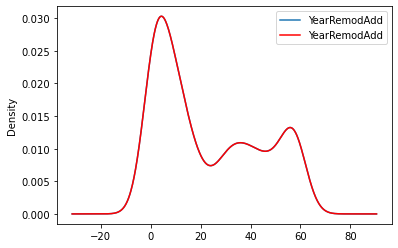

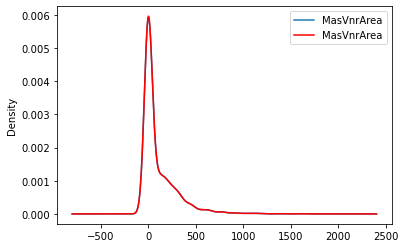

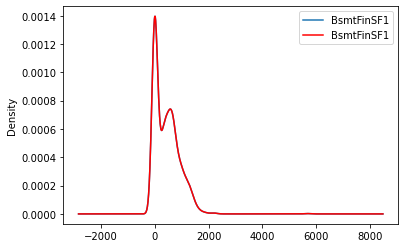

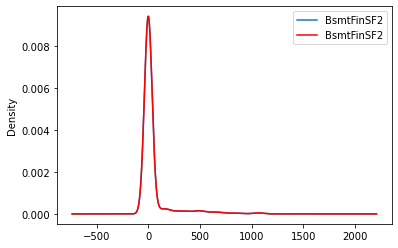

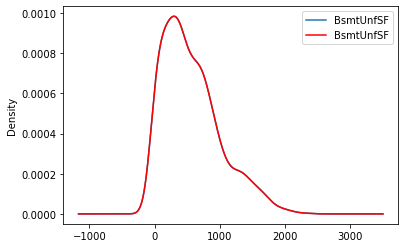

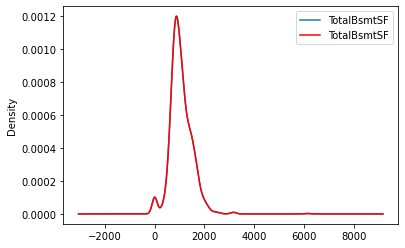

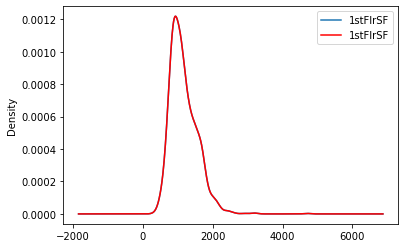

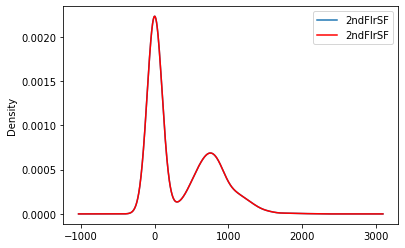

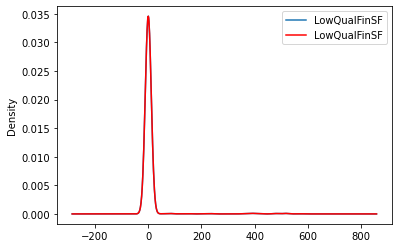

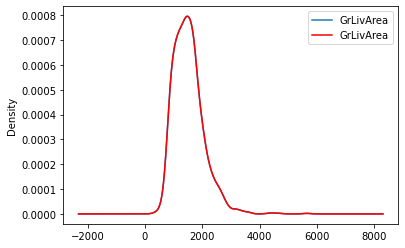

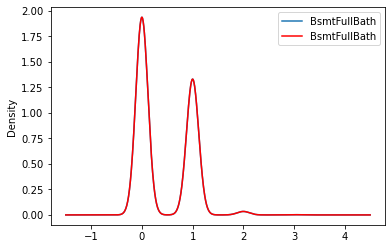

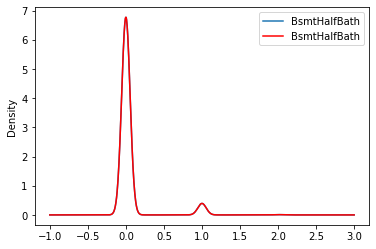

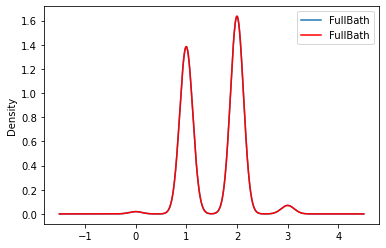

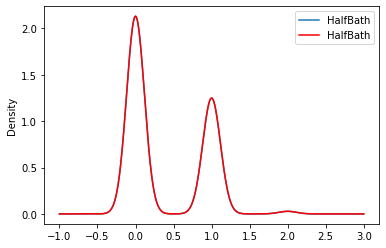

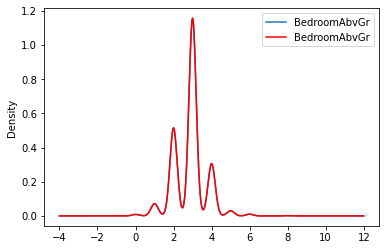

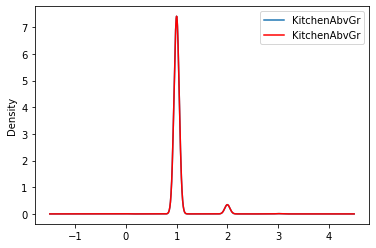

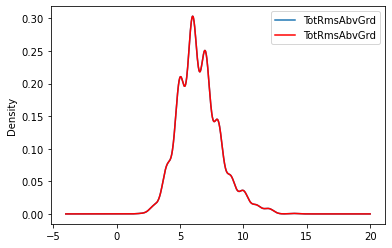

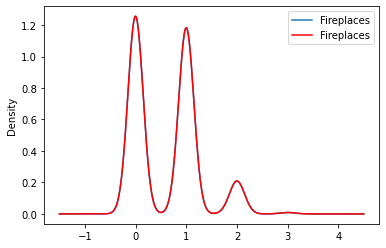

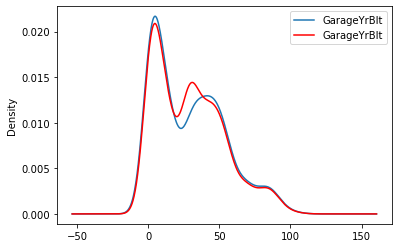

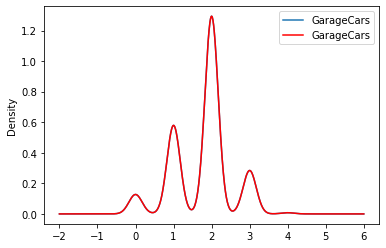

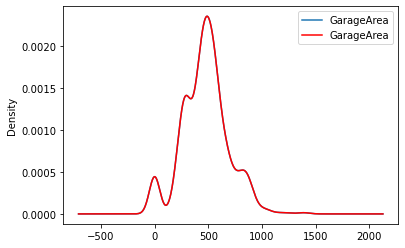

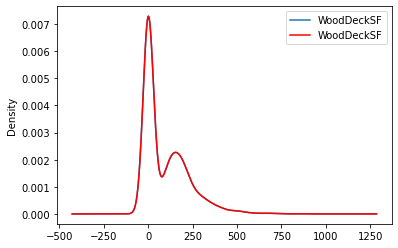

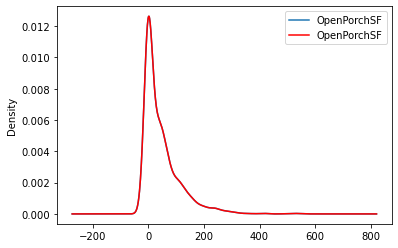

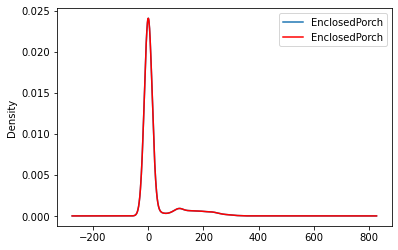

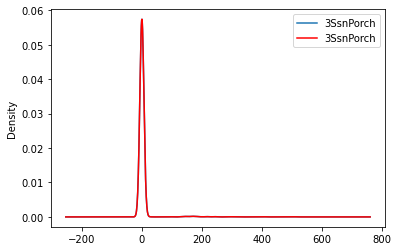

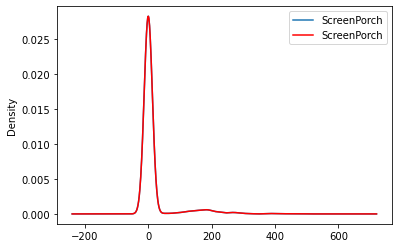

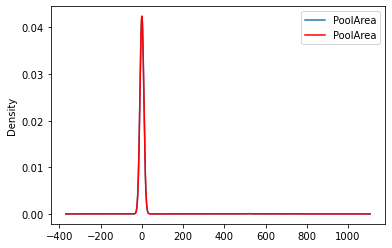

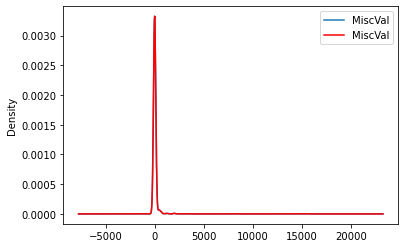

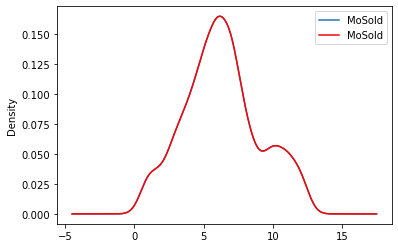

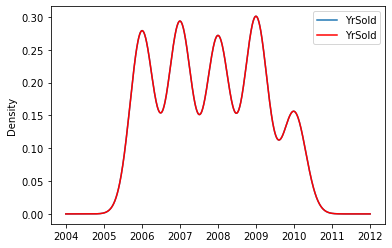

In [56]:
for val in num:

    fig = plt.figure()
    ax = fig.add_subplot(111)
    dataset[val].plot(kind='kde', ax=ax)
    train_t[val].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

In [64]:
cat_var = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
dataset[cat_var].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [65]:
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(variables= categorical)
imputer.fit(train_t)
train_1= imputer.transform(train_t)
test_1= imputer.transform(test_t)

In [66]:
train_1['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [67]:
train_1['YrSold'] = train_1['YrSold'].map(
                   { 2006: 619,2007: 692, 2008: 622, 2009: 647, 2010: 339})

In [68]:
test_1['YrSold'] = test_1['YrSold'].map(
                   { 2006: 619,2007: 692, 2008: 622, 2009: 647, 2010: 339})

In [70]:
discrete_feature = [feature for feature in num if len(train_1[feature].unique())<15 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [71]:
continuous_feature=[feature for feature in num if feature  not in discrete_feature and feature not in year_feature+['YrSold'] ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


In [72]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

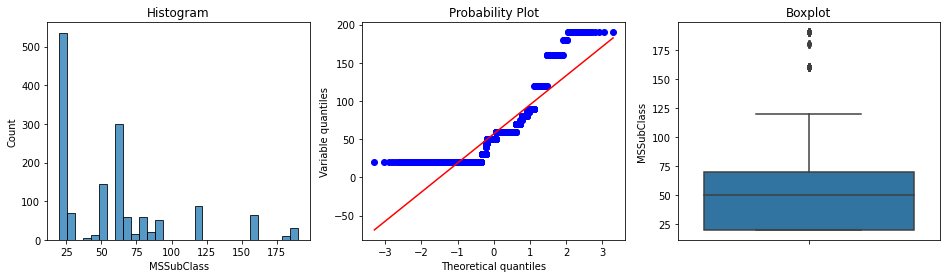

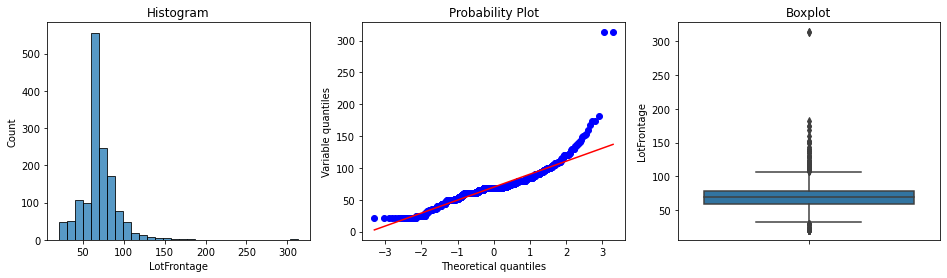

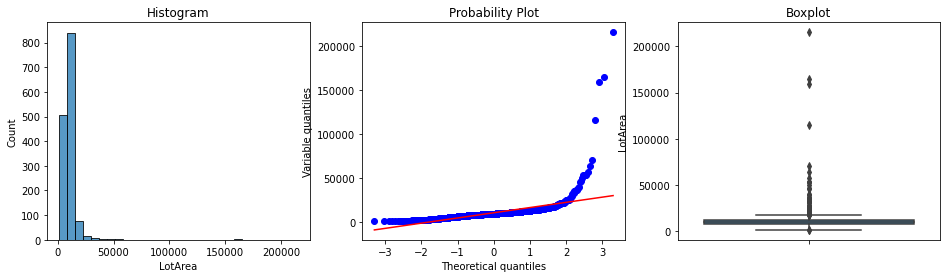

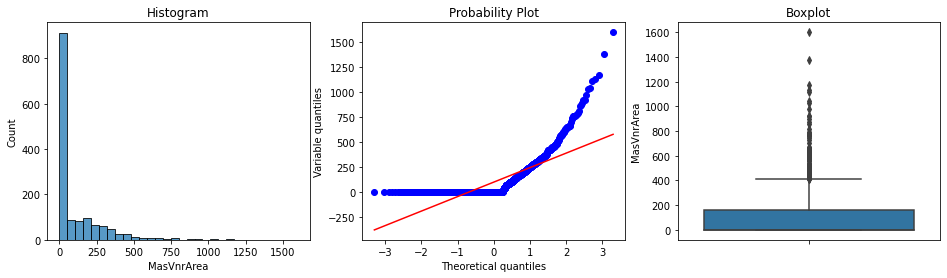

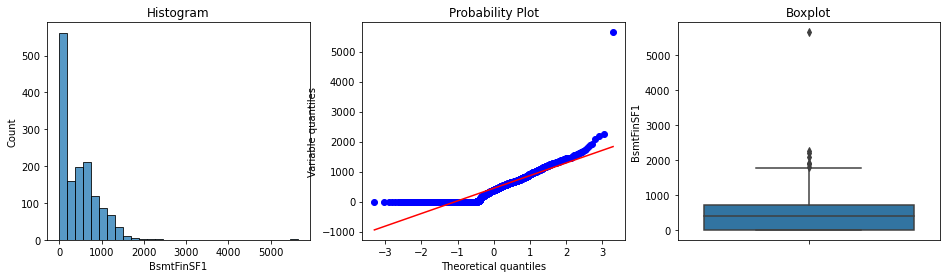

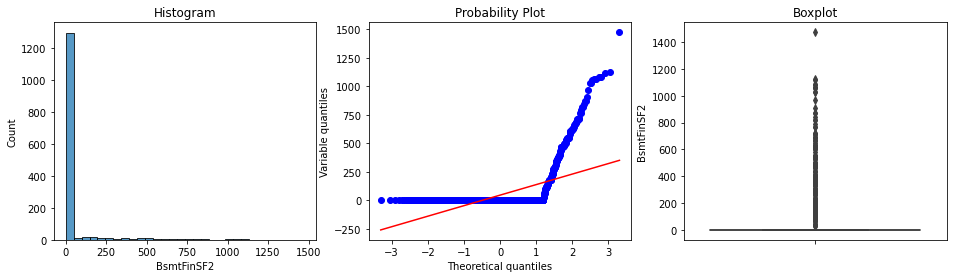

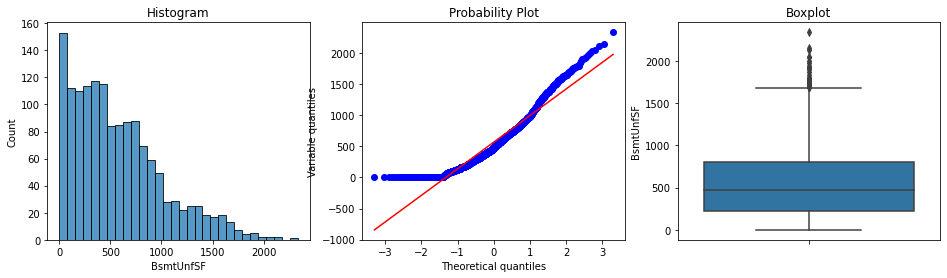

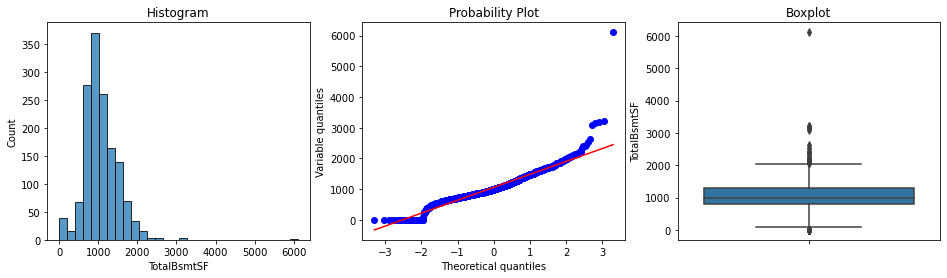

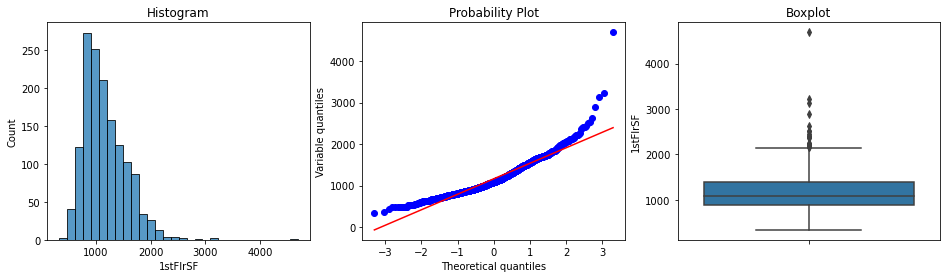

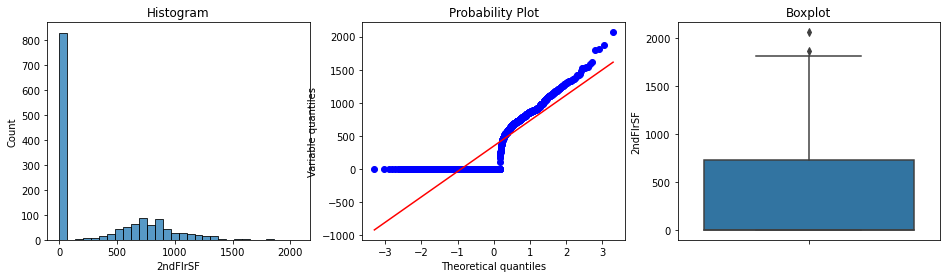

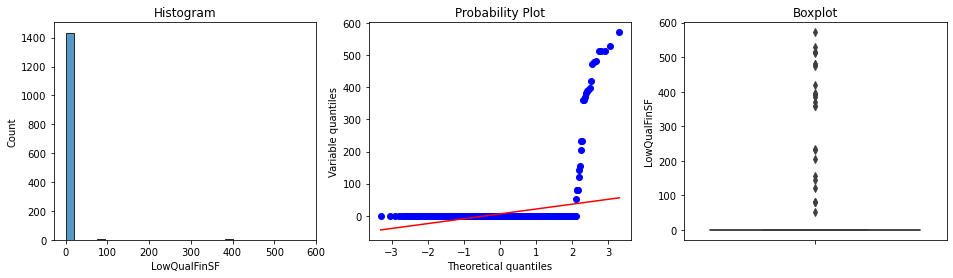

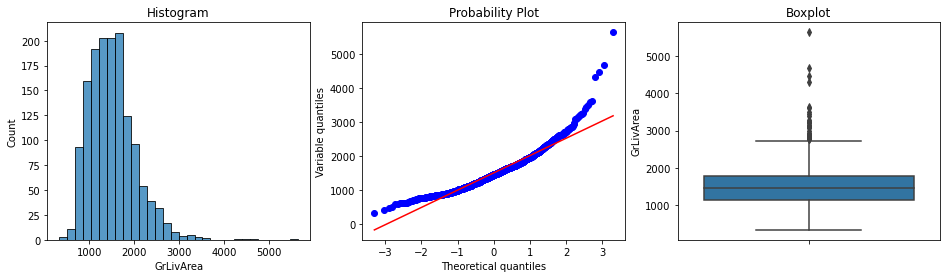

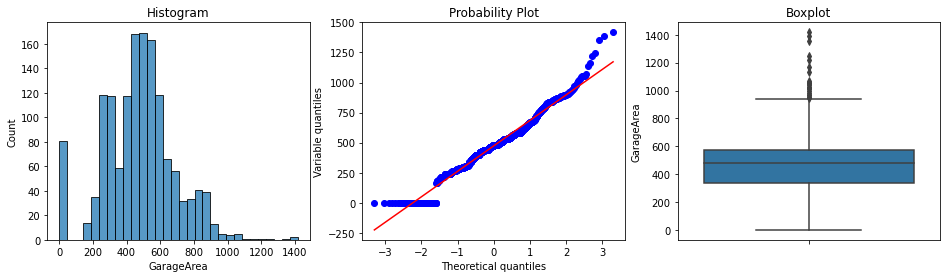

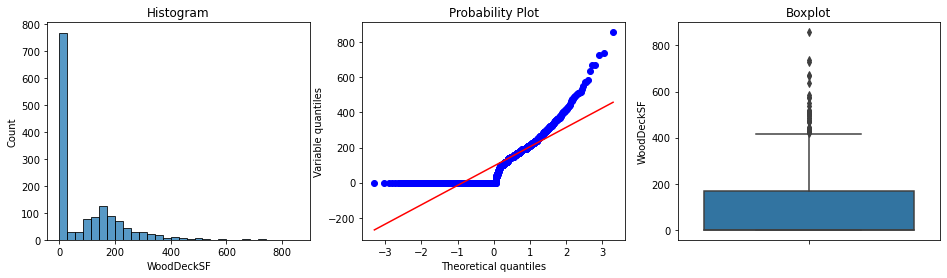

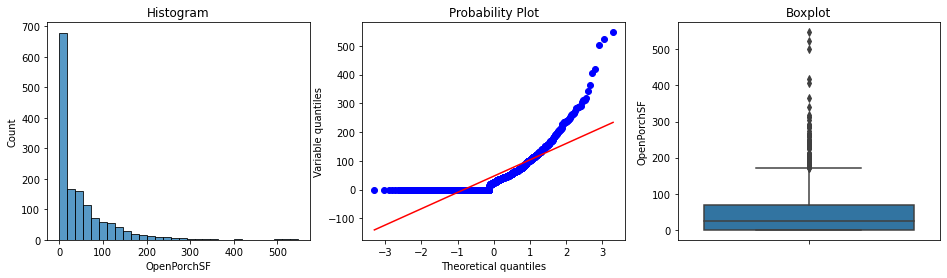

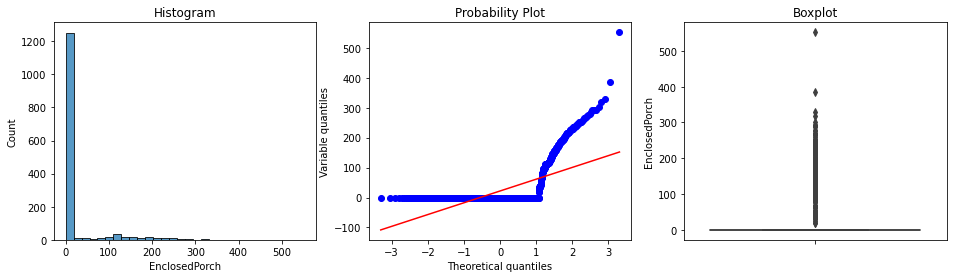

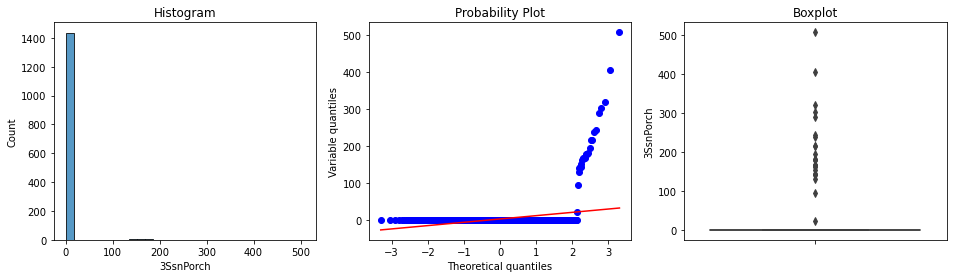

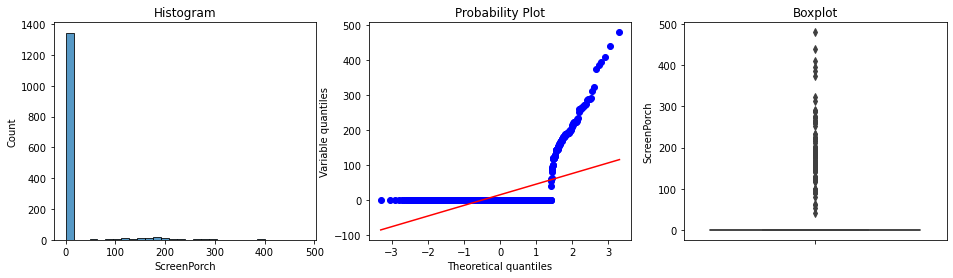

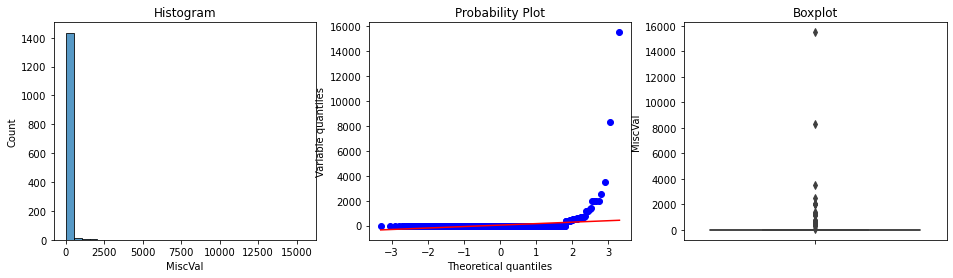

In [73]:
for feature in continuous_feature :
    diagnostic_plots(train_1, feature)


# Outlier treatment

In [74]:
from feature_engine.outliers import OutlierTrimmer
capper = OutlierTrimmer(capping_method='iqr', tail='right', fold= 3, variables= continuous_feature)
capper.fit(train_1)
train_2 = capper.transform(train_1)

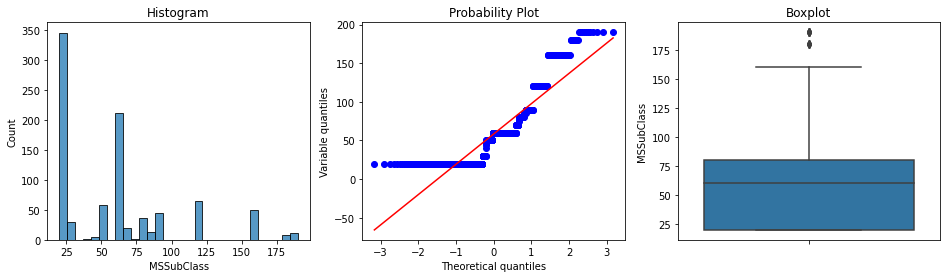

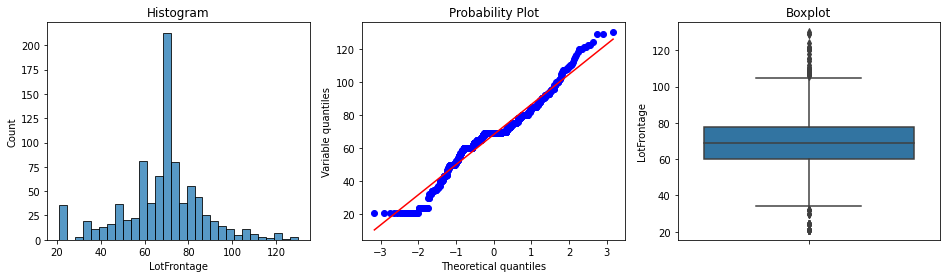

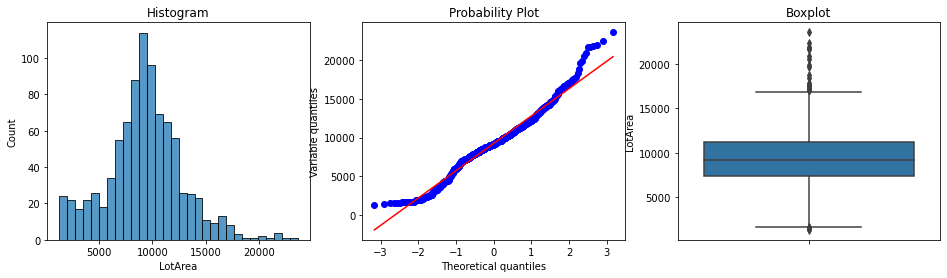

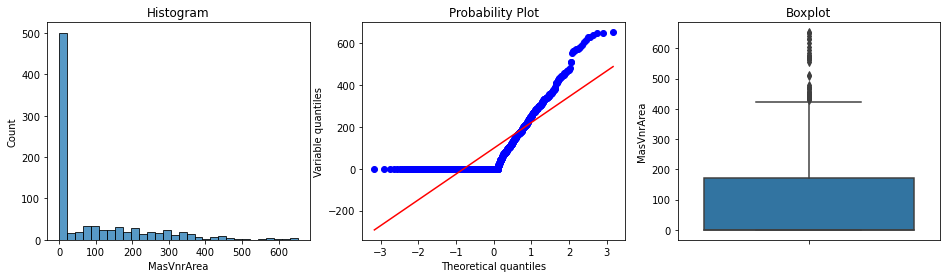

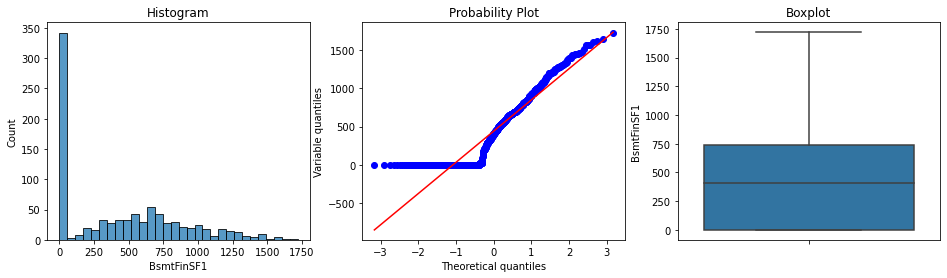

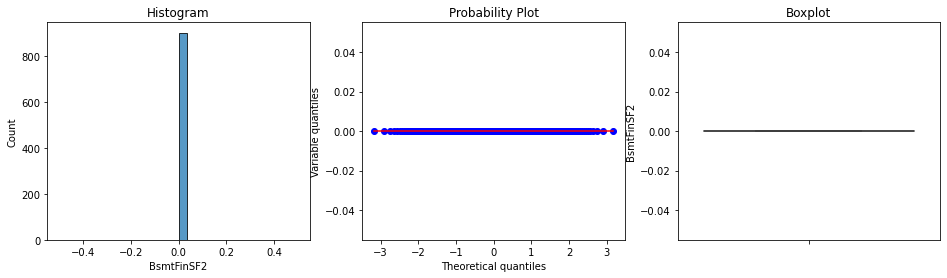

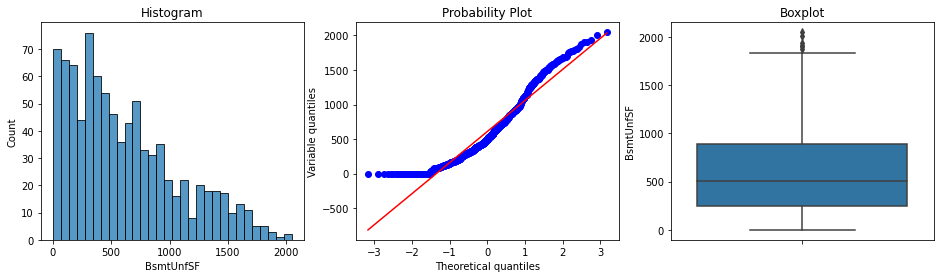

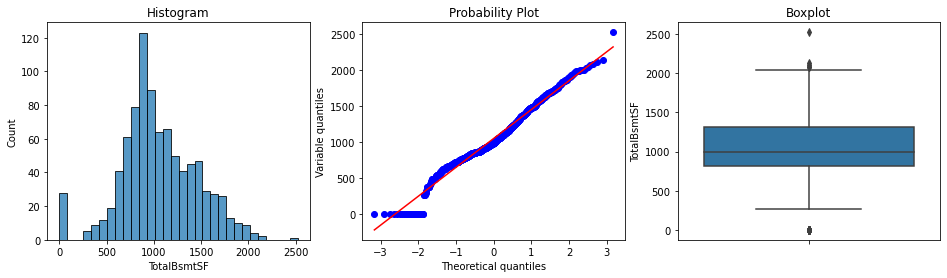

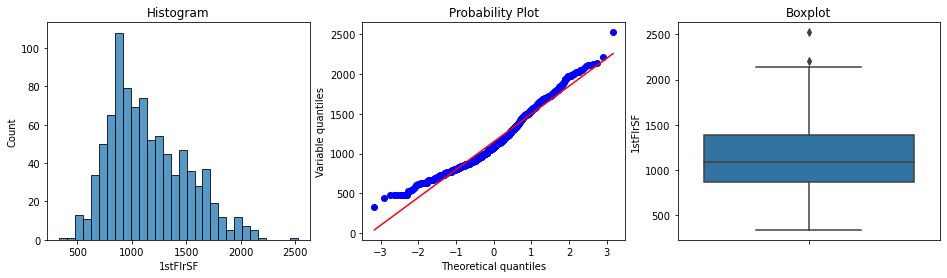

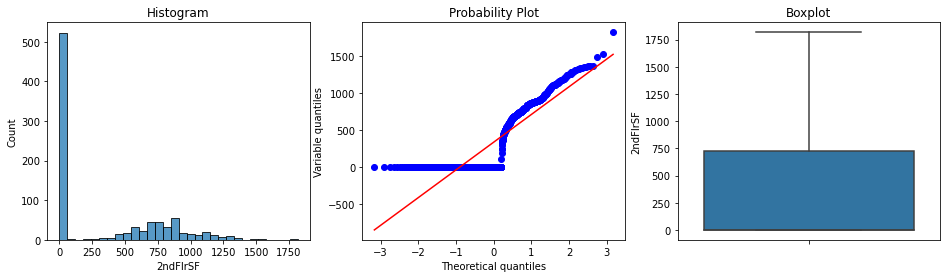

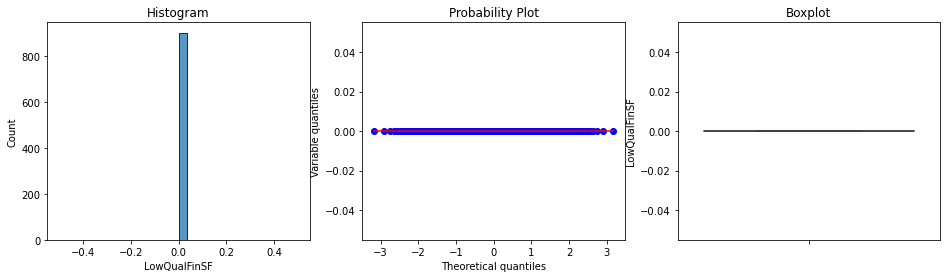

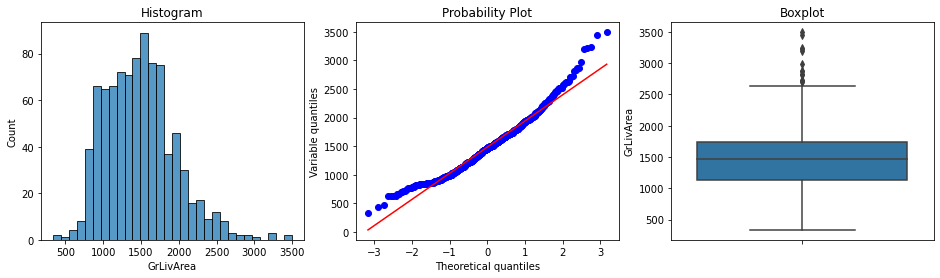

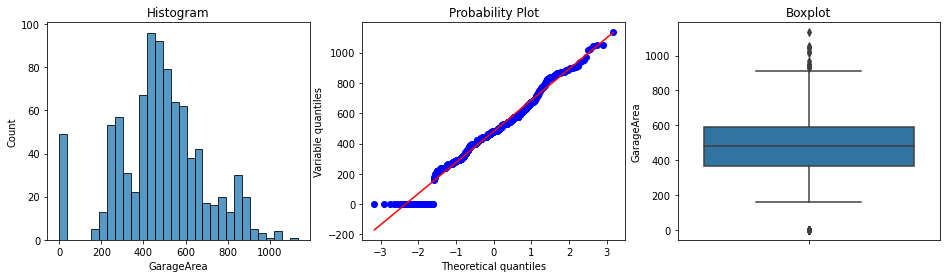

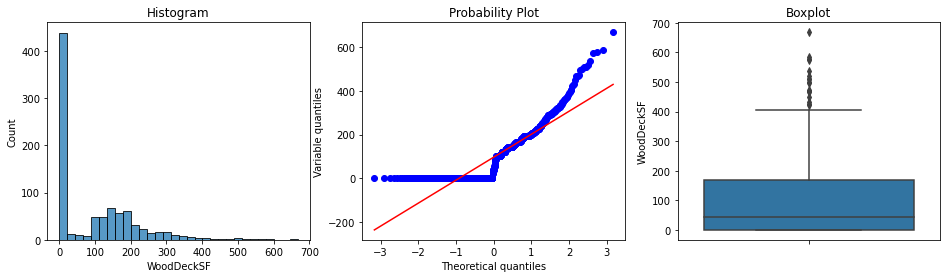

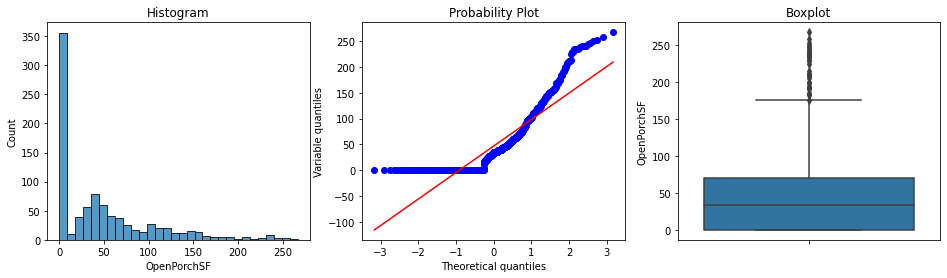

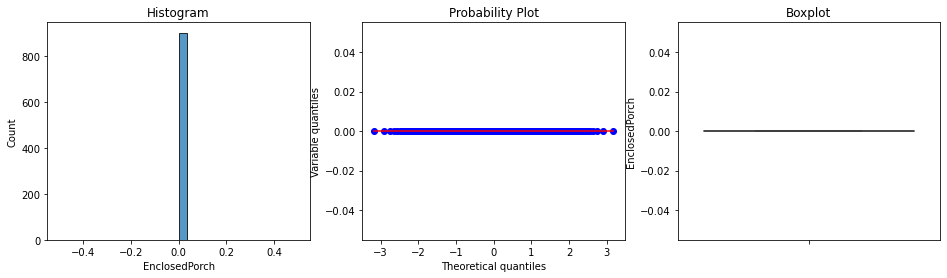

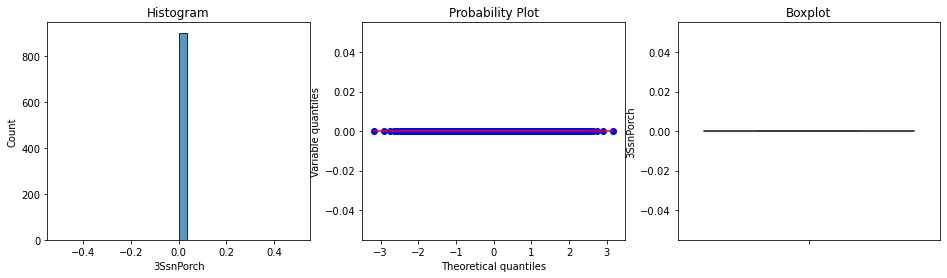

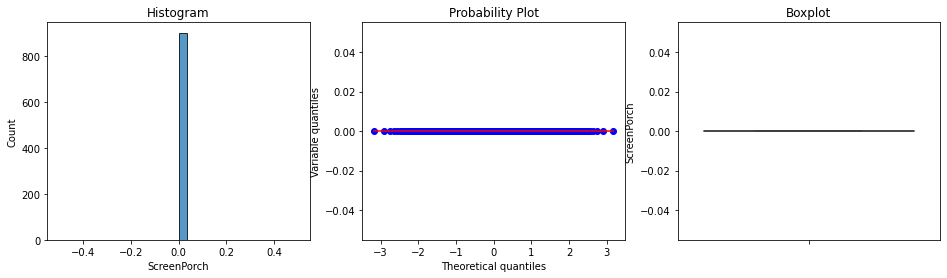

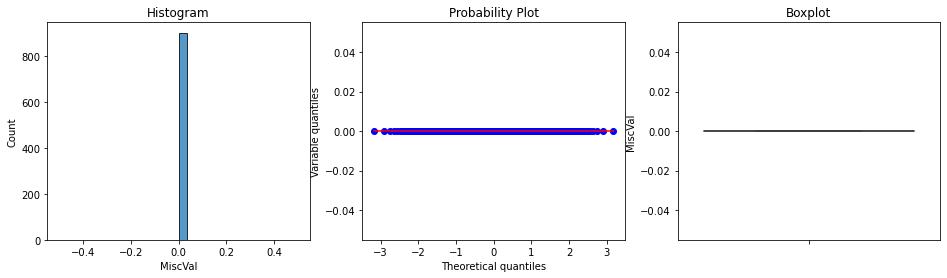

In [75]:
for feature in continuous_feature :
     diagnostic_plots(train_2, feature)

In [76]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables= continuous_feature )
capper.fit(train_1)
train_3= capper.transform(train_1)

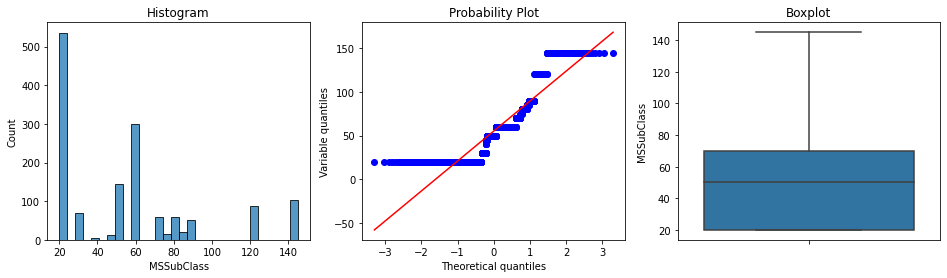

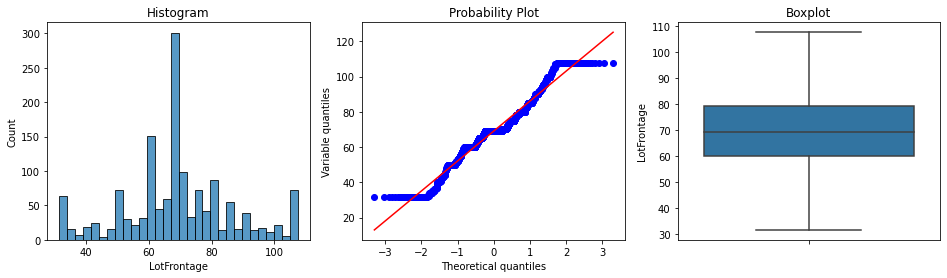

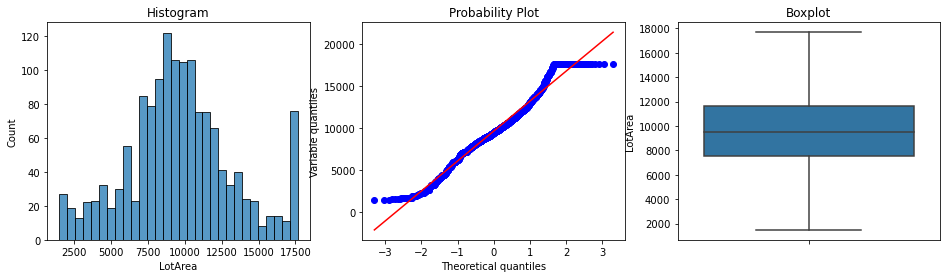

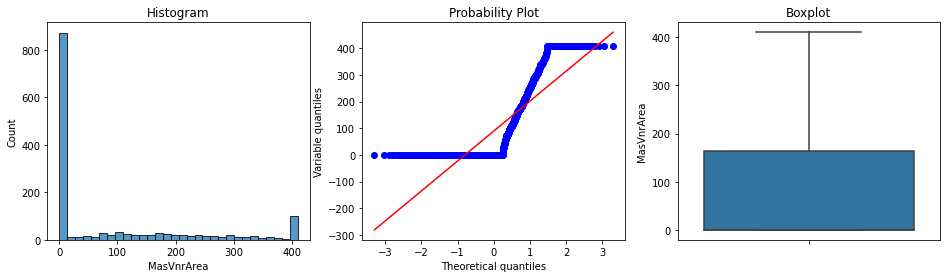

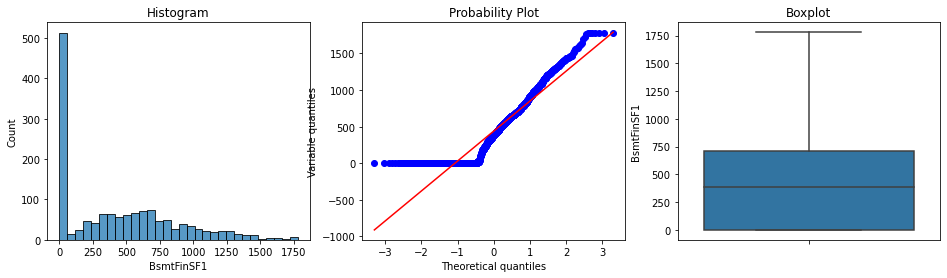

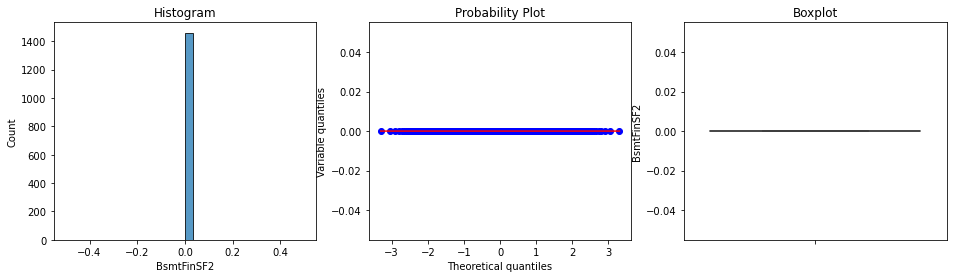

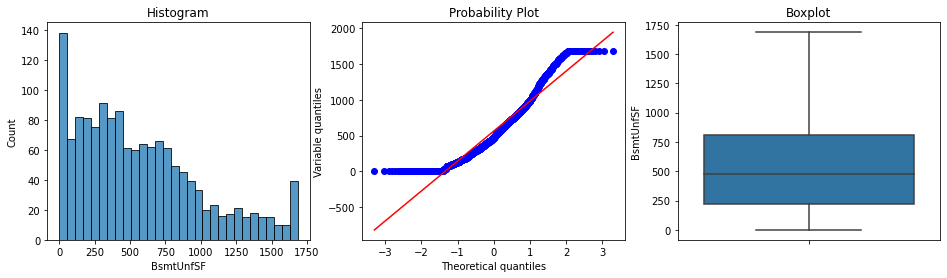

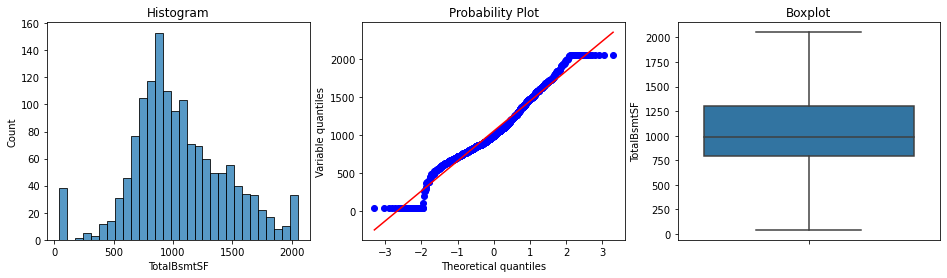

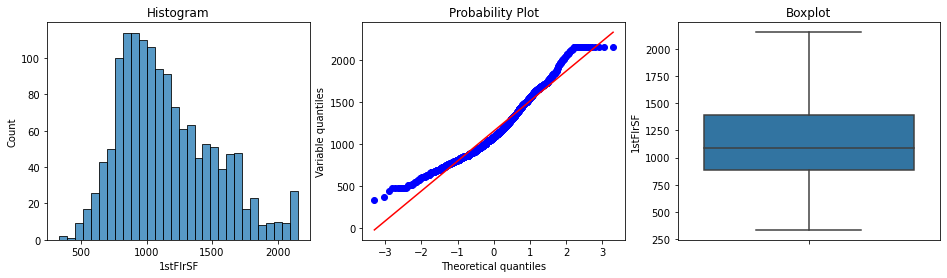

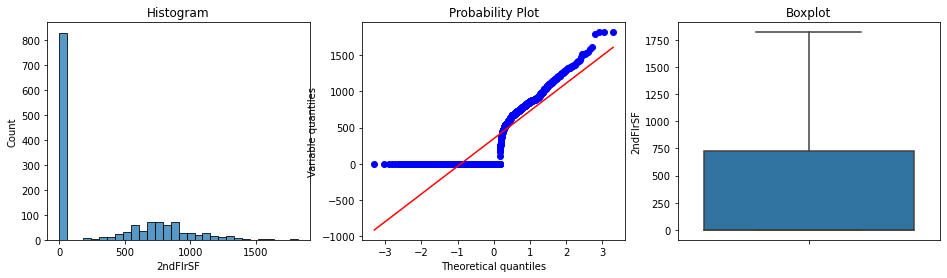

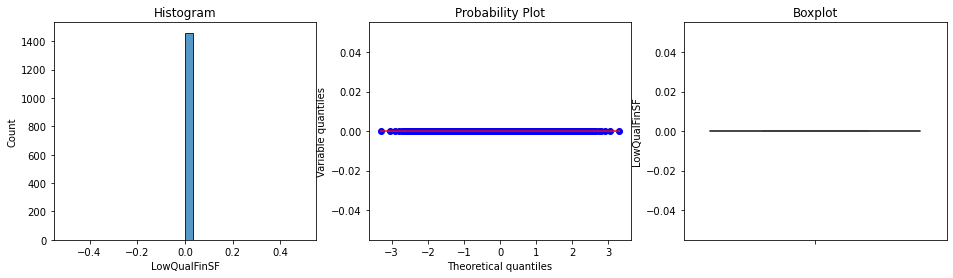

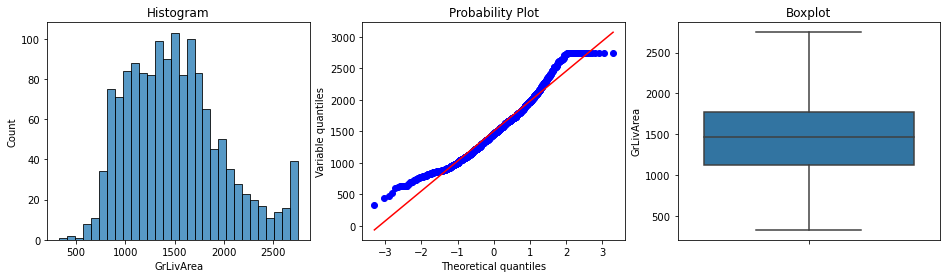

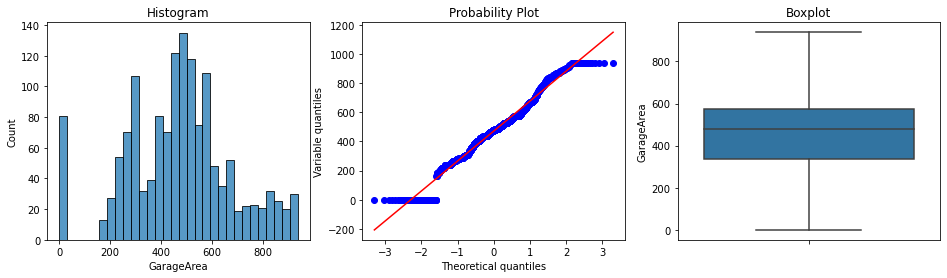

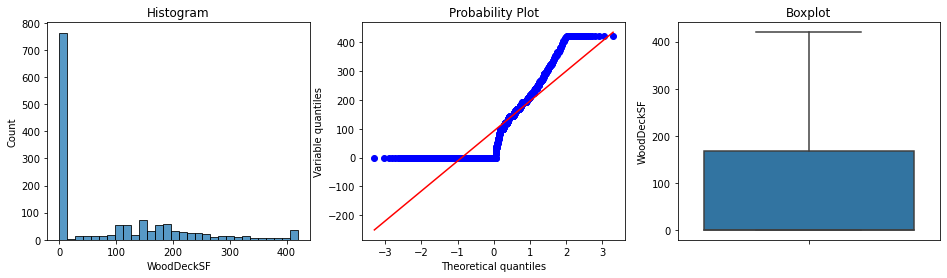

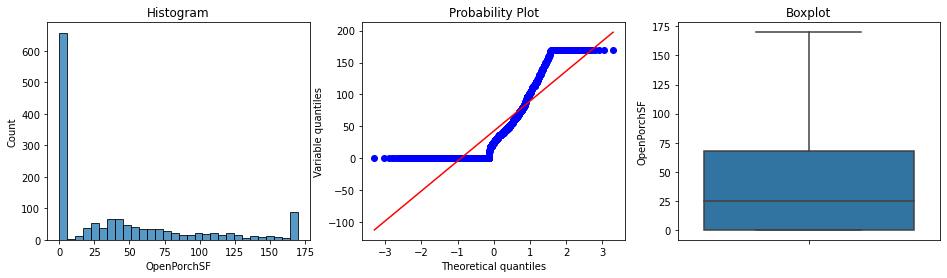

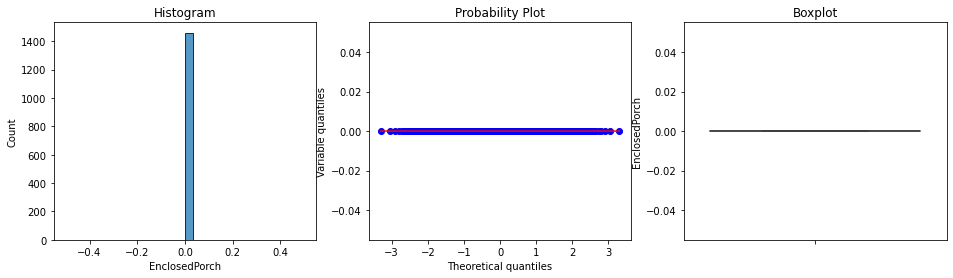

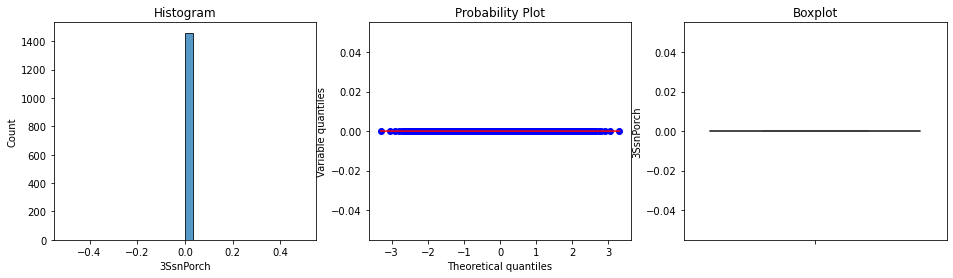

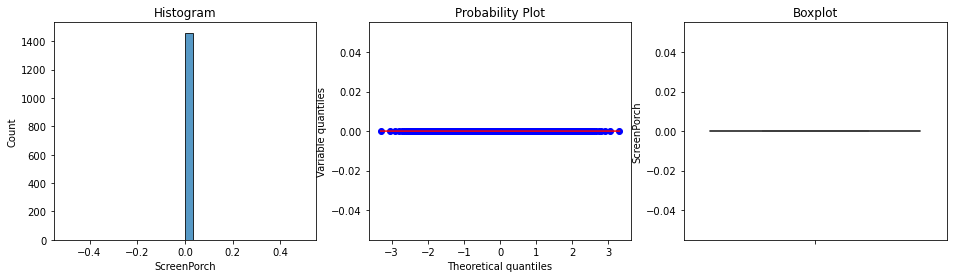

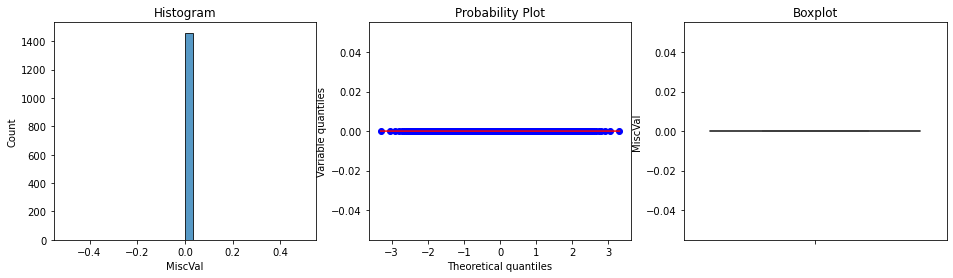

In [77]:
for feature in continuous_feature :
    diagnostic_plots(train_3, feature)

In [78]:
print('initial shape of train data',  train_1.shape) 
print('after removing outlier shape of train data',  train_2.shape)

initial shape of train data (1460, 74)
after removing outlier shape of train data (900, 74)


In [79]:
num_var = [feature for feature in train_1.columns if train_3[feature].dtypes != 'O'] 
len(num_var)

36

In [80]:
num_var_sd = [feature for feature in train_3.columns if train_1[feature].dtypes != 'O' and feature not in ['SalePrice']]
len(num_var_sd)

36

In [81]:
cat_var = [feature for feature in train_1.columns if train_3[feature].dtypes == 'O']

In [82]:
train_3[num_var_sd].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0            7            5          5   
1        20.0         80.0   9600.0            6            8         31   
2        60.0         68.0  11250.0            7            5          7   
3        70.0         60.0   9550.0            7            5         91   
4        60.0         84.0  14260.0            8            5          8   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             5       196.0       706.0         0.0      150.0        856.0   
1            31         0.0       978.0         0.0      284.0       1262.0   
2             6       162.0       486.0         0.0      434.0        920.0   
3            36         0.0       216.0         0.0      540.0        756.0   
4             8       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0             1             0   
1    1262.0       0.0           0.0     1262.0             0             1   
2     920.0     866.0           0.0     1786.0             1             0   
3     961.0     756.0           0.0     1717.0             1             0   
4    1145.0    1053.0           0.0     2198.0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          5.0           2       548.0         0.0         61.0   
1         31.0           2       460.0       298.0          0.0   
2          7.0           2       608.0         0.0         42.0   
3          8.0           3       642.0         0.0         35.0   
4          8.0           3       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0            0.0        0.0          0.0         0      0.0       2     622  
1            0.0        0.0          0.0         0      0.0       5     692  
2            0.0        0.0          0.0         0      0.0       9     622  
3            0.0        0.0          0.0         0      0.0       2     619  
4            0.0        0.0          0.0         0      0.0      12     622

# Standardization 

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_3[num_var_sd])

train_3[num_var_sd] = scaler.transform(train_3[num_var_sd])
test_1[num_var_sd] = scaler.transform(test_1[num_var_sd])

In [85]:
train_3[num_var_sd].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.131067    -0.237456 -0.333244     0.651479    -0.517200  -1.043259   
1   -0.935733     0.633321 -0.013189    -0.071836     2.179628  -0.183465   
2    0.131067    -0.063300  0.446022     0.651479    -0.517200  -0.977121   
3    0.397766    -0.527714 -0.027104     0.651479    -0.517200   1.800676   
4    0.131067     0.865528  1.283733     1.374795    -0.517200  -0.944052   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.869941    0.795643    0.614224         0.0  -0.958790    -0.488321   
1      0.390141   -0.667353    1.242296         0.0  -0.648290     0.532289   
2     -0.821476    0.541858    0.106224         0.0  -0.300716    -0.327437   
3      0.632464   -0.667353   -0.517230         0.0  -0.055097    -0.739702   
4     -0.724547    1.945140    0.496460         0.0  -0.170955     0.238172   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.830489  1.164283           0.0   0.428636      1.107810     -0.241061   
1  0.289638 -0.796041           0.0  -0.502349     -0.819964      3.948809   
2 -0.653917  1.191828           0.0   0.586571      1.107810     -0.241061   
3 -0.540801  0.939328           0.0   0.443182      1.107810     -0.241061   
4 -0.033157  1.621080           0.0   1.442744      1.107810     -0.241061   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.789741  1.227585      0.163779     -0.211454      0.912210   -0.951226   
1  0.789741 -0.761621      0.163779     -0.211454     -0.318683    0.600495   
2  0.789741  1.227585      0.163779     -0.211454     -0.318683    0.600495   
3 -1.026041 -0.761621      0.163779     -0.211454      0.296763    0.600495   
4  0.789741  1.227585      1.390023     -0.211454      1.527656    0.600495   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0    -1.008709    0.311725    0.373509   -0.787243     0.350520   
1     0.073527    0.311725   -0.051541    1.768105    -0.811747   
2    -0.925461    0.311725    0.663315   -0.787243    -0.011497   
3    -0.883836    1.650307    0.827539   -0.787243    -0.144872   
4    -0.883836    1.650307    1.764579    0.859156     0.788753   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
0            0.0        0.0          0.0 -0.068692      0.0 -1.599111   
1            0.0        0.0          0.0 -0.068692      0.0 -0.489110   
2            0.0        0.0          0.0 -0.068692      0.0  0.990891   
3            0.0        0.0          0.0 -0.068692      0.0 -1.599111   
4            0.0        0.0          0.0 -0.068692      0.0  2.100892   

     YrSold  
0  0.125832  
1  0.803136  
2  0.125832  
3  0.096804  
4  0.125832

# Feature Selection 

In [86]:
from feature_engine.selection import DropConstantFeatures
transformer = DropConstantFeatures(tol=0.90)
transformer.fit(train_3)

# transform the data
train_4 = transformer.transform(train_3)

In [87]:
val = transformer.features_to_drop_
len(val)

20

In [89]:
train_3.drop(val, axis = 1, inplace= True)
test_1.drop(val, axis = 1, inplace= True)
train_3.shape, test_1.shape

((1460, 54), (1459, 54))

In [90]:
from feature_engine.selection import DropCorrelatedFeatures
tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.85)
Xt = tr.fit_transform(train_4)

tr.correlated_feature_sets_

[{'GarageArea', 'GarageCars'}]

In [91]:
drop = tr.features_to_drop_
drop

{'GarageArea'}

In [92]:
train_4.drop(drop, axis = 1, inplace= True)
test_1.drop(drop, axis = 1, inplace= True)

train_4.shape, test_1.shape

((1460, 53), (1459, 53))

In [93]:
numerical = [feature for feature in train_4 if train_4[feature].dtypes != 'O']

In [94]:
cate = [feature for feature in train_4 if train_4[feature].dtypes == 'O']

# Categorical Encoding 

In [96]:
from feature_engine.encoding import OneHotEncoder
columns = ['LotShape', 'RoofStyle', 'ExterQual','ExterCond','BsmtQual','KitchenQual','MSZoning',
           'LotConfig','SaleType']

In [98]:
encoder = OneHotEncoder( top_categories=2, variables= columns, drop_last=False)
encoder.fit(train_4)

# transform the data
train_5= encoder.transform(train_4)
test_2 = encoder.transform(test_1)

In [99]:
train_5.head()

MSSubClass  LotFrontage   LotArea LandContour Neighborhood Condition1  \
0    0.131067    -0.237456 -0.333244         Lvl      CollgCr       Norm   
1   -0.935733     0.633321 -0.013189         Lvl      Veenker      Feedr   
2    0.131067    -0.063300  0.446022         Lvl      CollgCr       Norm   
3    0.397766    -0.527714 -0.027104         Lvl      Crawfor       Norm   
4    0.131067     0.865528  1.283733         Lvl      NoRidge       Norm   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story     0.651479    -0.517200  -1.043259     -0.869941   
1     1Fam     1Story    -0.071836     2.179628  -0.183465      0.390141   
2     1Fam     2Story     0.651479    -0.517200  -0.977121     -0.821476   
3     1Fam     2Story     0.651479    -0.517200   1.800676      0.632464   
4     1Fam     2Story     1.374795    -0.517200  -0.944052     -0.724547   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation BsmtCond  \
0     VinylSd     VinylSd    BrkFace    0.795643      PConc       TA   
1     MetalSd     MetalSd       None   -0.667353     CBlock       TA   
2     VinylSd     VinylSd    BrkFace    0.541858      PConc       TA   
3     Wd Sdng     Wd Shng       None   -0.667353     BrkTil       Gd   
4     VinylSd     VinylSd    BrkFace    1.945140      PConc       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ    0.614224          Unf  -0.958790    -0.488321   
1           Gd          ALQ    1.242296          Unf  -0.648290     0.532289   
2           Mn          GLQ    0.106224          Unf  -0.300716    -0.327437   
3           No          ALQ   -0.517230          Unf  -0.055097    -0.739702   
4           Av          GLQ    0.496460          Unf  -0.170955     0.238172   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex -0.830489  1.164283   0.428636      1.107810  0.789741  1.227585   
1        Ex  0.289638 -0.796041  -0.502349     -0.819964  0.789741 -0.761621   
2        Ex -0.653917  1.191828   0.586571      1.107810  0.789741  1.227585   
3        Gd -0.540801  0.939328   0.443182      1.107810 -1.026041 -0.761621   
4        Ex -0.033157  1.621080   1.442744      1.107810  0.789741  1.227585   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  \
0      0.163779      0.912210   -0.951226     Attchd    -1.008709   
1      0.163779     -0.318683    0.600495     Attchd     0.073527   
2      0.163779     -0.318683    0.600495     Attchd    -0.925461   
3      0.163779      0.296763    0.600495     Detchd    -0.883836   
4      1.390023      1.527656    0.600495     Attchd    -0.883836   

  GarageFinish  GarageCars GarageQual  WoodDeckSF  OpenPorchSF    MoSold  \
0          RFn    0.311725         TA   -0.787243     0.350520 -1.599111   
1          RFn    0.311725         TA    1.768105    -0.811747 -0.489110   
2          RFn    0.311725         TA   -0.787243    -0.011497  0.990891   
3          Unf    1.650307         TA   -0.787243    -0.144872 -1.599111   
4          RFn    1.650307         TA    0.859156     0.788753  2.100892   

     YrSold SaleCondition  LotShape_Reg  LotShape_IR1  RoofStyle_Gable  \
0  0.125832        Normal             1             0                1   
1  0.803136        Normal             1             0                1   
2  0.125832        Normal             0             1                1   
3  0.096804       Abnorml             0             1                1   
4  0.125832        Normal             0             1                1   

   RoofStyle_Hip  ExterQual_TA  ExterQual_Gd  ExterCond_TA  ExterCond_Gd  \
0              0             0             1             1             0   
1              0             1             0             1             0   
2              0             0             1             1             0   
3              0             1             0             1             0 

In [100]:
train_5.shape, test_2.shape

((1460, 62), (1459, 62))

In [101]:
cate = [feature for feature in train_5 if train_5[feature].dtypes == 'O']

In [103]:
from feature_engine.encoding import RareLabelEncoder
encoder = RareLabelEncoder(tol=0.03, n_categories=2, variables= cate,
                           replace_with='Rare')
encoder.fit(train_5)

# transform the data
train_6 = encoder.transform(train_5)
test_3 = encoder.transform(test_2)

In [104]:
train_6.head()

MSSubClass  LotFrontage   LotArea LandContour Neighborhood Condition1  \
0    0.131067    -0.237456 -0.333244         Lvl      CollgCr       Norm   
1   -0.935733     0.633321 -0.013189         Lvl         Rare      Feedr   
2    0.131067    -0.063300  0.446022         Lvl      CollgCr       Norm   
3    0.397766    -0.527714 -0.027104         Lvl      Crawfor       Norm   
4    0.131067     0.865528  1.283733         Lvl         Rare       Norm   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story     0.651479    -0.517200  -1.043259     -0.869941   
1     1Fam     1Story    -0.071836     2.179628  -0.183465      0.390141   
2     1Fam     2Story     0.651479    -0.517200  -0.977121     -0.821476   
3     1Fam     2Story     0.651479    -0.517200   1.800676      0.632464   
4     1Fam     2Story     1.374795    -0.517200  -0.944052     -0.724547   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea Foundation BsmtCond  \
0     VinylSd     VinylSd    BrkFace    0.795643      PConc       TA   
1     MetalSd     MetalSd       None   -0.667353     CBlock       TA   
2     VinylSd     VinylSd    BrkFace    0.541858      PConc       TA   
3     Wd Sdng        Rare       None   -0.667353     BrkTil       Gd   
4     VinylSd     VinylSd    BrkFace    1.945140      PConc       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ    0.614224          Unf  -0.958790    -0.488321   
1           Gd          ALQ    1.242296          Unf  -0.648290     0.532289   
2           Mn          GLQ    0.106224          Unf  -0.300716    -0.327437   
3           No          ALQ   -0.517230          Unf  -0.055097    -0.739702   
4           Av          GLQ    0.496460          Unf  -0.170955     0.238172   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex -0.830489  1.164283   0.428636      1.107810  0.789741  1.227585   
1        Ex  0.289638 -0.796041  -0.502349     -0.819964  0.789741 -0.761621   
2        Ex -0.653917  1.191828   0.586571      1.107810  0.789741  1.227585   
3        Gd -0.540801  0.939328   0.443182      1.107810 -1.026041 -0.761621   
4        Ex -0.033157  1.621080   1.442744      1.107810  0.789741  1.227585   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  \
0      0.163779      0.912210   -0.951226     Attchd    -1.008709   
1      0.163779     -0.318683    0.600495     Attchd     0.073527   
2      0.163779     -0.318683    0.600495     Attchd    -0.925461   
3      0.163779      0.296763    0.600495     Detchd    -0.883836   
4      1.390023      1.527656    0.600495     Attchd    -0.883836   

  GarageFinish  GarageCars GarageQual  WoodDeckSF  OpenPorchSF    MoSold  \
0          RFn    0.311725         TA   -0.787243     0.350520 -1.599111   
1          RFn    0.311725         TA    1.768105    -0.811747 -0.489110   
2          RFn    0.311725         TA   -0.787243    -0.011497  0.990891   
3          Unf    1.650307         TA   -0.787243    -0.144872 -1.599111   
4          RFn    1.650307         TA    0.859156     0.788753  2.100892   

     YrSold SaleCondition  LotShape_Reg  LotShape_IR1  RoofStyle_Gable  \
0  0.125832        Normal             1             0                1   
1  0.803136        Normal             1             0                1   
2  0.125832        Normal             0             1                1   
3  0.096804       Abnorml             0             1                1   
4  0.125832        Normal             0             1                1   

   RoofStyle_Hip  ExterQual_TA  ExterQual_Gd  ExterCond_TA  ExterCond_Gd  \
0              0             0             1             1             0   
1              0             1             0             1             0   
2              0             0             1             1             0   
3              0             1             0             1             0 

In [106]:
from feature_engine.encoding import CountFrequencyEncoder

encoder = CountFrequencyEncoder(encoding_method='frequency',
                         variables=['Neighborhood', 'BldgType', 'Exterior1st','Exterior2nd','BsmtFinType1'])

# fit the encoder
encoder.fit(train_6)

# transform the data
train_7= encoder.transform(train_6)
test_4 = encoder.transform(test_3)

In [107]:
train_7.head()

MSSubClass  LotFrontage   LotArea LandContour  Neighborhood Condition1  \
0    0.131067    -0.237456 -0.333244         Lvl      0.102740       Norm   
1   -0.935733     0.633321 -0.013189         Lvl      0.182192      Feedr   
2    0.131067    -0.063300  0.446022         Lvl      0.102740       Norm   
3    0.397766    -0.527714 -0.027104         Lvl      0.034932       Norm   
4    0.131067     0.865528  1.283733         Lvl      0.182192       Norm   

   BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  0.835616     2Story     0.651479    -0.517200  -1.043259     -0.869941   
1  0.835616     1Story    -0.071836     2.179628  -0.183465      0.390141   
2  0.835616     2Story     0.651479    -0.517200  -0.977121     -0.821476   
3  0.835616     2Story     0.651479    -0.517200   1.800676      0.632464   
4  0.835616     2Story     1.374795    -0.517200  -0.944052     -0.724547   

   Exterior1st  Exterior2nd MasVnrType  MasVnrArea Foundation BsmtCond  \
0     0.352740     0.345205    BrkFace    0.795643      PConc       TA   
1     0.150685     0.146575       None   -0.667353     CBlock       TA   
2     0.352740     0.345205    BrkFace    0.541858      PConc       TA   
3     0.141096     0.093151       None   -0.667353     BrkTil       Gd   
4     0.352740     0.345205    BrkFace    1.945140      PConc       TA   

  BsmtExposure  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No      0.286301    0.614224          Unf  -0.958790    -0.488321   
1           Gd      0.150685    1.242296          Unf  -0.648290     0.532289   
2           Mn      0.286301    0.106224          Unf  -0.300716    -0.327437   
3           No      0.150685   -0.517230          Unf  -0.055097    -0.739702   
4           Av      0.286301    0.496460          Unf  -0.170955     0.238172   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex -0.830489  1.164283   0.428636      1.107810  0.789741  1.227585   
1        Ex  0.289638 -0.796041  -0.502349     -0.819964  0.789741 -0.761621   
2        Ex -0.653917  1.191828   0.586571      1.107810  0.789741  1.227585   
3        Gd -0.540801  0.939328   0.443182      1.107810 -1.026041 -0.761621   
4        Ex -0.033157  1.621080   1.442744      1.107810  0.789741  1.227585   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  \
0      0.163779      0.912210   -0.951226     Attchd    -1.008709   
1      0.163779     -0.318683    0.600495     Attchd     0.073527   
2      0.163779     -0.318683    0.600495     Attchd    -0.925461   
3      0.163779      0.296763    0.600495     Detchd    -0.883836   
4      1.390023      1.527656    0.600495     Attchd    -0.883836   

  GarageFinish  GarageCars GarageQual  WoodDeckSF  OpenPorchSF    MoSold  \
0          RFn    0.311725         TA   -0.787243     0.350520 -1.599111   
1          RFn    0.311725         TA    1.768105    -0.811747 -0.489110   
2          RFn    0.311725         TA   -0.787243    -0.011497  0.990891   
3          Unf    1.650307         TA   -0.787243    -0.144872 -1.599111   
4          RFn    1.650307         TA    0.859156     0.788753  2.100892   

     YrSold SaleCondition  LotShape_Reg  LotShape_IR1  RoofStyle_Gable  \
0  0.125832        Normal             1             0                1   
1  0.803136        Normal             1             0                1   
2  0.125832        Normal             0             1                1   
3  0.096804       Abnorml             0             1                1   
4  0.125832        Normal             0             1                1   

   RoofStyle_Hip  ExterQual_TA  ExterQual_Gd  ExterCond_TA  ExterCond_Gd  \
0              0             0             1             1             0   
1              0             1             0             1             0   
2              0             0             1             1             0   
3              0             1             

In [108]:
cate = [feature for feature in train_7 if train_7[feature].dtypes == 'O']
train_7[cate].head()

LandContour Condition1 HouseStyle MasVnrType Foundation BsmtCond  \
0         Lvl       Norm     2Story    BrkFace      PConc       TA   
1         Lvl      Feedr     1Story       None     CBlock       TA   
2         Lvl       Norm     2Story    BrkFace      PConc       TA   
3         Lvl       Norm     2Story       None     BrkTil       Gd   
4         Lvl       Norm     2Story    BrkFace      PConc       TA   

  BsmtExposure BsmtFinType2 HeatingQC GarageType GarageFinish GarageQual  \
0           No          Unf        Ex     Attchd          RFn         TA   
1           Gd          Unf        Ex     Attchd          RFn         TA   
2           Mn          Unf        Ex     Attchd          RFn         TA   
3           No          Unf        Gd     Detchd          Unf         TA   
4           Av          Unf        Ex     Attchd          RFn         TA   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [111]:
train_7.shape, test_4.shape

((1460, 62), (1459, 62))

In [112]:
X = train_7
y = dataset['SalePrice']

In [116]:
cate = [feature for feature in train_7 if train_7[feature].dtypes == 'O']
train_7[cate].head()

LandContour Condition1 HouseStyle MasVnrType Foundation BsmtCond  \
0         Lvl       Norm     2Story    BrkFace      PConc       TA   
1         Lvl      Feedr     1Story       None     CBlock       TA   
2         Lvl       Norm     2Story    BrkFace      PConc       TA   
3         Lvl       Norm     2Story       None     BrkTil       Gd   
4         Lvl       Norm     2Story    BrkFace      PConc       TA   

  BsmtExposure BsmtFinType2 HeatingQC GarageType GarageFinish GarageQual  \
0           No          Unf        Ex     Attchd          RFn         TA   
1           Gd          Unf        Ex     Attchd          RFn         TA   
2           Mn          Unf        Ex     Attchd          RFn         TA   
3           No          Unf        Gd     Detchd          Unf         TA   
4           Av          Unf        Ex     Attchd          RFn         TA   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [118]:
from feature_engine.encoding import OrdinalEncoder
encoder = OrdinalEncoder(encoding_method='ordered', variables=['HouseStyle', 'GarageType', 'GarageQual','SaleCondition','GarageFinish'])

# fit the encoder
encoder.fit(X, y )

# transform the data
train_8= encoder.transform(X)
test_5 = encoder.transform(test_4)
#encoder.encoder_dict_
train_8.shape, test_5.shape

((1460, 62), (1459, 62))

In [119]:
cate = [feature for feature in train_8 if train_8[feature].dtypes == 'O']
train_8[cate].head()

LandContour Condition1 MasVnrType Foundation BsmtCond BsmtExposure  \
0         Lvl       Norm    BrkFace      PConc       TA           No   
1         Lvl      Feedr       None     CBlock       TA           Gd   
2         Lvl       Norm    BrkFace      PConc       TA           Mn   
3         Lvl       Norm       None     BrkTil       Gd           No   
4         Lvl       Norm    BrkFace      PConc       TA           Av   

  BsmtFinType2 HeatingQC  
0          Unf        Ex  
1          Unf        Ex  
2          Unf        Ex  
3          Unf        Gd  
4          Unf        Ex

In [121]:
from feature_engine.encoding import DecisionTreeEncoder
encoder = DecisionTreeEncoder(variables=['LandContour', 'HeatingQC', 'BsmtFinType2','Foundation'], random_state=0)

# fit the encoder
encoder.fit(train_8, y)

# transform the data
train_9 = encoder.transform(train_8)
test_6 = encoder.transform(test_5)
train_9.head()

MSSubClass  LotFrontage   LotArea    LandContour  Neighborhood Condition1  \
0    0.131067    -0.237456 -0.333244  180183.746758      0.102740       Norm   
1   -0.935733     0.633321 -0.013189  180183.746758      0.182192      Feedr   
2    0.131067    -0.063300  0.446022  180183.746758      0.102740       Norm   
3    0.397766    -0.527714 -0.027104  180183.746758      0.034932       Norm   
4    0.131067     0.865528  1.283733  180183.746758      0.182192       Norm   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  0.835616           4     0.651479    -0.517200  -1.043259     -0.869941   
1  0.835616           3    -0.071836     2.179628  -0.183465      0.390141   
2  0.835616           4     0.651479    -0.517200  -0.977121     -0.821476   
3  0.835616           4     0.651479    -0.517200   1.800676      0.632464   
4  0.835616           4     1.374795    -0.517200  -0.944052     -0.724547   

   Exterior1st  Exterior2nd MasVnrType  MasVnrArea     Foundation BsmtCond  \
0     0.352740     0.345205    BrkFace    0.795643  225230.442040       TA   
1     0.150685     0.146575       None   -0.667353  149805.714511       TA   
2     0.352740     0.345205    BrkFace    0.541858  225230.442040       TA   
3     0.141096     0.093151       None   -0.667353  132291.075342       Gd   
4     0.352740     0.345205    BrkFace    1.945140  225230.442040       TA   

  BsmtExposure  BsmtFinType1  BsmtFinSF1   BsmtFinType2  BsmtUnfSF  \
0           No      0.286301    0.614224  184694.690287  -0.958790   
1           Gd      0.150685    1.242296  184694.690287  -0.648290   
2           Mn      0.286301    0.106224  184694.690287  -0.300716   
3           No      0.150685   -0.517230  184694.690287  -0.055097   
4           Av      0.286301    0.496460  184694.690287  -0.170955   

   TotalBsmtSF      HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0    -0.488321  214914.429150 -0.830489  1.164283   0.428636      1.107810   
1     0.532289  214914.429150  0.289638 -0.796041  -0.502349     -0.819964   
2    -0.327437  214914.429150 -0.653917  1.191828   0.586571      1.107810   
3    -0.739702  156858.871369 -0.540801  0.939328   0.443182      1.107810   
4     0.238172  214914.429150 -0.033157  1.621080   1.442744      1.107810   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageType  \
0  0.789741  1.227585      0.163779      0.912210   -0.951226           3   
1  0.789741 -0.761621      0.163779     -0.318683    0.600495           3   
2  0.789741  1.227585      0.163779     -0.318683    0.600495           3   
3 -1.026041 -0.761621      0.163779      0.296763    0.600495           1   
4  0.789741  1.227585      1.390023      1.527656    0.600495           3   

   GarageYrBlt  GarageFinish  GarageCars  GarageQual  WoodDeckSF  OpenPorchSF  \
0    -1.008709             2    0.311725           2   -0.787243     0.350520   
1     0.073527             2    0.311725           2    1.768105    -0.811747   
2    -0.925461             2    0.311725           2   -0.787243    -0.011497   
3    -0.883836             1    1.650307           2   -0.787243    -0.144872   
4    -0.883836             2    1.650307           2    0.859156     0.788753   

     MoSold    YrSold  SaleCondition  LotShape_Reg  LotShape_IR1  \
0 -1.599111  0.125832              2             1             0   
1 -0.489110  0.803136              2             1             0   
2  0.990891  0.125832              2             0             1   
3 -1.599111  0.096804              0             0             1   
4  2.100892  0.125832              2             0             1   

   RoofStyle_Gable  RoofStyle_Hip  ExterQual_TA  ExterQual_Gd  ExterCond_TA  \
0                1              0             0             1             1   
1                1              0             1             0             1   
2                1              0             0             1             1   
3                1 

In [125]:
train_9.shape, test_6.shape

((1460, 62), (1459, 62))

In [127]:

# set up the encoder
encoder = OneHotEncoder( top_categories=2, variables=['Condition1', 'MasVnrType', 'BsmtCond','BsmtExposure'], drop_last=False)

# fit the encoder
encoder.fit(train_9)

# transform the data
train_10= encoder.transform(train_9)
test_7= encoder.transform(test_6)

In [128]:
train_10.shape, test_7.shape

((1460, 66), (1459, 66))

In [129]:
cate = [feature for feature in train_10 if train_10[feature].dtypes == 'O']
cate

[]

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_10, y, test_size=0.2, random_state=100)

# DecisionTreeRegressor

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


regressor_dtr = DecisionTreeRegressor(random_state=100)
regressor_dtr.fit(X_train, y_train)
y_pred = regressor_dtr.predict(X_test)

print('R square Accuracy: ',r2_score(y_test,y_pred))
print('RMSE Score: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R square Accuracy:  0.7901638174695879
RMSE Score:  36729.49412737317


# RandomForestRegressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=79, random_state=100, ccp_alpha = 7)
regressor_rf.fit(X_train,y_train)
y_pred = regressor_rf.predict(X_test)
y_predt = regressor_rf.predict(X_train)


print('R square Accuracy: ',r2_score(y_train,y_predt))
print('R square Accuracy: ',r2_score(y_test,y_pred))
print('RMSE Score: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R square Accuracy:  0.979883819780625
R square Accuracy:  0.8731907039678131
RMSE Score:  28552.905261089


# LinearRegression

In [144]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
y_pred = regressor_lr.predict(X_test)
y_predt = regressor_rf.predict(X_train)

print('R square Accuracy: ',r2_score(y_train,y_predt))
print('R square Accuracy: ',r2_score(y_test,y_pred))
print('RMSE Score: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R square Accuracy:  0.979883819780625
R square Accuracy:  0.8777661949331332
RMSE Score:  28033.054682840935


# XGBRegressor

In [160]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.02,n_estimators=3000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0.1, subsample=0.6,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha= 1)
xgb = xgboost.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_predt = xgb.predict(X_train)
print('R square Accuracy: ',r2_score(y_train,y_predt))
print('R square Accuracy: ',r2_score(y_test,y_pred))
print('RMSE Score: ', np.sqrt(mean_squared_error(y_test, y_pred)))

[21:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R square Accuracy:  0.9960026377481886
R square Accuracy:  0.9145118755264485
RMSE Score:  23443.780857240832


In [165]:
y_pred_test = xgb.predict(test_7)
y_pred_test.shape

(1459,)

# submission_file

In [163]:
my_submission = pd.DataFrame({'Id': test_id.Id, 'SalePrice': y_pred_test})
my_submission.to_csv('sample_submission_xgb.csv', index=False)

# GridSearchCV

In [166]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [168]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03,0.04], 
              'max_depth': [2,3,4,5],
              'min_child_weight': [4.3],
              'silent': [1],
              'subsample': [0.7,0.8,0.6,0.5,0.65,0.75],
              'colsample_bytree': [0.7],
              'n_estimators': [1000, 1500, 1300, 2000,2500]
             }

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5 ,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[22:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.8773907089184932
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 4.3, 'n_estimators': 1300, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.75}


In [171]:
train_pred = xgb_grid.predict(X_train)
val_pred = xgb_grid.predict(X_test)

In [172]:
from sklearn.metrics import r2_score
r2_score(y_test, val_pred)

0.9160258550439644

In [173]:
from sklearn.metrics import r2_score
r2_score(y_train, train_pred)

0.9975278023593619